# **Seattle Airbnb Data Analysis**

### 1. Business Understanding
- The purpose of this study is to make a deep understanding of the price of Seattle Airbnb and to provide some insights for the hosts to
increase their income.
- In this study, the answers of the following three questions will be puesued

   1.What is the busiest times of the year to visit Seattle? By how much do prices spike?
   
 **2.What factors have a relationship with the price of Seattle Airbnb?** 
   
 **3.Is the performance of the hosts affectting the price of Seattle Airbnb?**

### 2. Data Understanding

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_listings = pd.read_csv('listings.csv')

In [7]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

#### A look at the detailed data to decide which columns to drop

In [8]:
df_listings[['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview']].head() # index0-9

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi..."
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...


In [9]:
df_listings['last_scraped'].value_counts() # all the data has the same value so it is ok to drop 

2016-01-04    3818
Name: last_scraped, dtype: int64

In [10]:
df_listings['name'].value_counts() # there is no category in the name column so it is ok to drop ok to drop

Capitol Hill Apartment                 3
Charming Craftsman in Ballard          2
Capitol Hill Master Bedroom            2
Secluded Setting in North Seattle      2
Privacy & gorgeous panoramic views!    2
                                      ..
Clean and bright suite bedroom(可中文)    1
Private Bedroom in Northgate           1
Cozy Bachelor Pad in Queen Anne        1
A Creative Live/Work Loft + Studio     1
Lovely Tudor near UW/Children's        1
Name: name, Length: 3792, dtype: int64

In [11]:
df_listings['description'].value_counts() #there is no category in the name column so it is ok to drop ok to drop

Our space is a mix of a hostel and a home. We are a group of long-term residents & subletors who welcome short term guests. This is the house to meet folks whether you are moving to town or traveling through. The house offers quiet and social spaces. Our listing offers a unique Airbnb experience of staying with other Airbnb guests in a shared room as well as in a house of roommates who live in Seattle. This room is a great fit for individual or groups of travelers on a budget who are interested in meeting interesting people right in the place they are staying! We created this house so that people from around the world could meet, share experiences together and potentially create long lasting friendships that go beyond their time in our house. In a big house we are making the world smaller with more connections between people. Below is more information about your shared room, about us and about our house. Read through and see if we are a good fit for your trip! ABOUT YOUR SHARED ROOM:  

In [13]:
df_drop=['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview'] # These columns are not strong factors to price so it is ok to drop ok to drop

In [14]:
df_listings[[ 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url']].head() # index10-17

,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url
0,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883
1,What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328
2,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,https://a2.muscache.com/ac/pictures/b4324e0f-a...,NaN,16708587,https://www.airbnb.com/users/show/16708587
3,NaN,NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/94146944/6...,NaN,9851441,https://www.airbnb.com/users/show/9851441
4,Belltown,The nearest public transit bus (D Line) is 2 b...,NaN,NaN,https://a1.muscache.com/ac/pictures/6120468/b0...,NaN,1452570,https://www.airbnb.com/users/show/1452570


In [15]:
drop=['notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url']
for item in drop:
    df_drop.append(item)
# These columns are not strong factors to price so it is ok to drop ok to drop

In [16]:
df_drop

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url']

In [18]:
df_listings[['host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified']].head() # index18-33

,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified
0,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t
1,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t
2,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t
3,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,f,https://a2.muscache.com/ac/users/9851441/profi...,https://a2.muscache.com/ac/users/9851441/profi...,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t
4,Emily,2011-11-29,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",within an hour,100%,NaN,f,https://a0.muscache.com/ac/users/1452570/profi...,https://a0.muscache.com/ac/users/1452570/profi...,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t


In [19]:
df_listings['host_since'].value_counts()

2013-08-30    51
2013-02-04    39
2011-10-03    37
2011-03-08    37
2012-07-27    35
              ..
2011-05-27     1
2010-04-19     1
2014-12-22     1
2010-08-06     1
2015-10-20     1
Name: host_since, Length: 1380, dtype: int64

In [20]:
df_listings['host_location'].value_counts() #ok to drop

Seattle, Washington, United States        3259
US                                         246
Spokane, Washington, United States          41
Kent, Washington, United States             34
Los Angeles, California, United States      13
                                          ... 
Austin, Texas, United States                 1
Phoenix, Arizona, United States              1
New Orleans, Louisiana, United States        1
Houston, Texas, United States                1
Vashon Island, Seattle, WA                   1
Name: host_location, Length: 120, dtype: int64

In [21]:
df_listings['host_verifications'].value_counts() #left at once

['email', 'phone', 'facebook', 'reviews', 'kba']                                           595
['email', 'phone', 'reviews', 'kba']                                                       436
['email', 'phone', 'reviews']                                                              329
['email', 'phone', 'facebook', 'reviews', 'jumio']                                         322
['email', 'phone', 'reviews', 'jumio']                                                     194
                                                                                          ... 
['email', 'phone', 'facebook', 'manual_offline', 'jumio']                                    1
['email', 'phone', 'facebook', 'linkedin', 'amex', 'reviews', 'jumio', 'kba']                1
['email', 'phone', 'manual_online', 'facebook', 'reviews', 'manual_offline', 'sent_id']      1
['phone', 'linkedin', 'reviews']                                                             1
['email', 'phone', 'facebook', 'google', 'linkedin

In [22]:
df_listings['host_identity_verified'].value_counts()

t    2997
f     819
Name: host_identity_verified, dtype: int64

In [23]:
drop_2=['host_name','host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_acceptance_rate',
        'host_listings_count', 'host_total_listings_count',  'host_has_profile_pic']
for item in drop_2:
    df_drop.append(item)
# These columns are not strong factors to price so it is ok to drop ok to drop

In [24]:
df_drop

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_location',
 'host_about',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_name',
 'host_location',
 'host_about',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic']

In [25]:
df_listings[[ 'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact',]].head() # index34-47

,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact
0,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t
1,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t
2,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t
3,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.638473,-122.369279,t
4,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.632918,-122.372471,t


In [26]:
df_listings['neighbourhood'].value_counts()

Capitol Hill          351
Ballard               213
Belltown              204
Minor                 192
Queen Anne            187
                     ... 
South Park              2
Pike Market             2
Roxhill                 1
North College Park      1
Fairmount Park          1
Name: neighbourhood, Length: 81, dtype: int64

In [27]:
df_listings['neighbourhood_cleansed'].value_counts()

Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
South Beacon Hill      4
Pinehurst              4
South Park             3
Roxhill                2
Name: neighbourhood_cleansed, Length: 87, dtype: int64

In [28]:
df_listings['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [29]:
df_listings[ 'is_location_exact'].value_counts()

t    3412
f     406
Name: is_location_exact, dtype: int64

In [30]:
drop_3=[ 'street','city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude']
for item in drop_3:
    df_drop.append(item)
# These columns are not strong factors to price so it is ok to drop ok to drop

In [31]:
df_drop

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_location',
 'host_about',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_name',
 'host_location',
 'host_about',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'street',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude']

In [32]:
df_listings[['property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee']].head() # index48-61

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN
1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00
2,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$975.00,NaN,NaN,"$1,000.00",$300.00
3,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,$100.00,$650.00,"$2,300.00",NaN,NaN
4,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,$450.00,NaN,NaN,$700.00,$125.00


In [33]:
df_listings['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

In [34]:
df_listings['room_type'].value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [35]:
df_listings['accommodates'].value_counts()

2     1627
4      785
3      398
6      332
1      256
5      184
8      119
7       52
10      25
12      15
9       13
16       4
14       3
11       3
15       2
Name: accommodates, dtype: int64

In [36]:
df_listings['amenities'].value_counts() #left at once

{}                                                                                                                                                                                                                                                                                                                                 45
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                             11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"24-Hour Check-in",Hangers,"Hair Dryer",Iron}                               10
{TV,"Cable TV",Interne

In [37]:
df_listings['security_deposit'].value_counts()

$100.00      348
$200.00      283
$300.00      235
$250.00      232
$500.00      230
$150.00      191
$350.00       79
$95.00        66
$400.00       49
$1,000.00     29
$750.00       14
$125.00       12
$1,500.00     11
$800.00       10
$600.00        9
$175.00        9
$700.00        5
$99.00         5
$450.00        5
$2,500.00      5
$2,000.00      4
$199.00        3
$120.00        3
$995.00        3
$295.00        3
$1,200.00      2
$550.00        2
$650.00        1
$375.00        1
$5,000.00      1
$360.00        1
$149.00        1
$115.00        1
$780.00        1
$134.00        1
$140.00        1
$225.00        1
$399.00        1
$220.00        1
$195.00        1
$185.00        1
$449.00        1
$109.00        1
$180.00        1
$1,900.00      1
$499.00        1
Name: security_deposit, dtype: int64

In [38]:
df_listings[ 'cleaning_fee'].value_counts()

$50.00     310
$25.00     245
$60.00     185
$20.00     171
$100.00    170
          ... 
$178.00      1
$240.00      1
$137.00      1
$22.00       1
$76.00       1
Name: cleaning_fee, Length: 118, dtype: int64

In [40]:
drop_4=[ 'square_feet']
for item in drop_4:
    df_drop.append(item)
# This column is not strong factors to price so it is ok to drop ok to drop

In [41]:
df_drop

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_location',
 'host_about',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_name',
 'host_location',
 'host_about',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'street',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'square_feet',
 'square_feet']

In [42]:
df_listings[['guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'first_review', 'last_review',]].head() # index62-75

,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review
0,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02
1,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29
2,10,$25.00,4,30,5 weeks ago,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03
3,1,$0.00,1,1125,6 months ago,t,0,0,0,143,2016-01-04,0,NaN,NaN
4,6,$15.00,1,1125,7 weeks ago,t,30,60,90,365,2016-01-04,38,2012-07-10,2015-10-24


In [43]:
df_listings['guests_included'].value_counts()

1     2275
2      989
4      237
0       92
3       80
6       71
5       28
8       24
7       14
10       2
9        2
12       1
11       1
13       1
15       1
Name: guests_included, dtype: int64

In [417]:
df_listings['extra_people'].value_counts()

$0.00      2048
$10.00      355
$25.00      322
$15.00      309
$20.00      308
$50.00      113
$30.00       85
$5.00        58
$40.00       39
$35.00       35
$100.00      16
$75.00       14
$7.00        12
$45.00       10
$29.00        9
$8.00         8
$60.00        8
$12.00        8
$18.00        6
$17.00        6
$9.00         5
$19.00        5
$14.00        4
$6.00         4
$55.00        3
$28.00        3
$80.00        3
$200.00       2
$22.00        2
$49.00        2
$300.00       2
$16.00        1
$33.00        1
$48.00        1
$27.00        1
$26.00        1
$175.00       1
$13.00        1
$250.00       1
$71.00        1
$85.00        1
$68.00        1
$21.00        1
$36.00        1
$44.00        1
Name: extra_people, dtype: int64

In [44]:
drop_5=['first_review', 'last_review']
for item in drop_5:
    df_drop.append(item)
# These columns are not strong factors to price so it is ok to drop ok to drop

In [45]:
df_drop

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_location',
 'host_about',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_name',
 'host_location',
 'host_about',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'street',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'square_feet',
 'square_feet',
 'first_review',
 'last_review']

In [46]:
df_listings[[ 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', ]].head() # index76-82

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92.0,9.0,9.0,10.0,10.0,9.0,9.0


In [47]:
df_listings[[ 'requires_license',
       'license', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month' ]].head() # index83-91

,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [48]:
df_listings['requires_license'].value_counts() # The data has the same value so it is ok to drop

f    3818
Name: requires_license, dtype: int64

In [50]:
df_listings['license'].value_counts() # There is not value in the column so it is ok to drop

Series([], Name: license, dtype: int64)

In [51]:
df_listings['calculated_host_listings_count'].value_counts()

1     2451
2      575
3      262
4      130
5       70
6       65
37      37
31      36
34      34
11      22
7       21
21      21
8       19
9       19
18      18
15      16
12      12
10      10
Name: calculated_host_listings_count, dtype: int64

In [53]:
drop_6=['requires_license','license','jurisdiction_names','calculated_host_listings_count', 'reviews_per_month']
for item in drop_6:
    df_drop.append(item)
# These columns are not strong factors to price so it is ok to drop ok to drop

In [54]:
df_drop

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_location',
 'host_about',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_name',
 'host_location',
 'host_about',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'street',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'square_feet',
 'square_feet',
 'first_review',
 'last_review',
 'requires_license',
 'license',
 'jurisdiction_names',
 'calculated_host_listings_count',
 'reviews_per_

In [55]:
len(df_drop)

62

In [56]:
df_listings.drop(columns=df_drop,index=1,inplace=True)

In [57]:
df_listings.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,is_location_exact,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2011-08-11,within a few hours,96%,f,"['email', 'phone', 'reviews', 'kba']",t,Queen Anne,West Queen Anne,Queen Anne,t,...,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f
2,2014-06-12,within a few hours,67%,f,"['email', 'phone', 'google', 'reviews', 'jumio']",t,Queen Anne,West Queen Anne,Queen Anne,t,...,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f
3,2013-11-06,NaN,NaN,f,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Queen Anne,West Queen Anne,Queen Anne,t,...,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f
4,2011-11-29,within an hour,100%,f,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,Queen Anne,West Queen Anne,Queen Anne,t,...,9.0,9.0,10.0,10.0,9.0,9.0,f,strict,f,f
5,2010-12-25,NaN,NaN,f,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,Queen Anne,West Queen Anne,Queen Anne,t,...,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f


In [58]:
df_listings.isnull().sum()

host_since                             2
host_response_time                   523
host_response_rate                   523
host_is_superhost                      2
host_verifications                     0
host_identity_verified                 2
neighbourhood                        416
neighbourhood_cleansed                 0
neighbourhood_group_cleansed           0
is_location_exact                      0
property_type                          1
room_type                              0
accommodates                           0
bathrooms                             16
bedrooms                               6
beds                                   1
bed_type                               0
amenities                              0
price                                  0
weekly_price                        1809
monthly_price                       2301
security_deposit                    1952
cleaning_fee                        1030
guests_included                        0
extra_people    

### 3. Data Preparation and visualization

#### Neighbourhood and Price

In [59]:
df_price=df_listings[['price','weekly_price','monthly_price','cleaning_fee']]
df_price.head()

,price,weekly_price,monthly_price,cleaning_fee
0,$85.00,NaN,NaN,NaN
2,$975.00,NaN,NaN,$300.00
3,$100.00,$650.00,"$2,300.00",NaN
4,$450.00,NaN,NaN,$125.00
5,$120.00,$800.00,NaN,$40.00


In [60]:
def price_transform(col_):
    ''' Returns the input column without $-sings and as float-type 
    
    INPUT (pd.Series)
    OUTPUT (pd.Series)
    '''

    col = col_
    col = col.replace('[\$,]', '', regex=True).astype(float)
    return col

In [61]:
for item in df_price.columns:
    df_price[item]=price_transform(df_price[item])

<ipython-input-61-7faa43942cd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price[item]=price_transform(df_price[item])


In [62]:
df_price.head()

,price,weekly_price,monthly_price,cleaning_fee
0,85.0,NaN,NaN,NaN
2,975.0,NaN,NaN,300.0
3,100.0,650.0,2300.0,NaN
4,450.0,NaN,NaN,125.0
5,120.0,800.0,NaN,40.0


In [63]:
df_price_2=pd.concat([df_listings['neighbourhood_group_cleansed'],df_price['price']],axis=1)

In [64]:
df_price_2.head()

,neighbourhood_group_cleansed,price
0,Queen Anne,85.0
2,Queen Anne,975.0
3,Queen Anne,100.0
4,Queen Anne,450.0
5,Queen Anne,120.0


In [65]:
df_price_3=df_price_2.groupby('neighbourhood_group_cleansed').mean(9)
df_price_3.head()

,price
neighbourhood_group_cleansed,
Ballard,124.682609
Beacon Hill,94.669492
Capitol Hill,130.592593
Cascade,140.101124
Central Area,128.338753


In [72]:
df_price_3.reset_index('neighbourhood_group_cleansed')
df_price_3

,price
neighbourhood_group_cleansed,
Ballard,124.682609
Beacon Hill,94.669492
Capitol Hill,130.592593
Cascade,140.101124
Central Area,128.338753
Delridge,83.278481
Downtown,154.405660
Interbay,109.727273
Lake City,92.671642


In [74]:
df_price_4=df_price_3.sort_values('price')
df_price_4

,price
neighbourhood_group_cleansed,
Delridge,83.278481
Northgate,88.550000
Rainier Valley,91.899371
Lake City,92.671642
University District,93.639344
Beacon Hill,94.669492
Seward Park,108.477273
Interbay,109.727273
Other neighborhoods,119.968514


<ipython-input-75-19d196ee8928>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation='vertical')


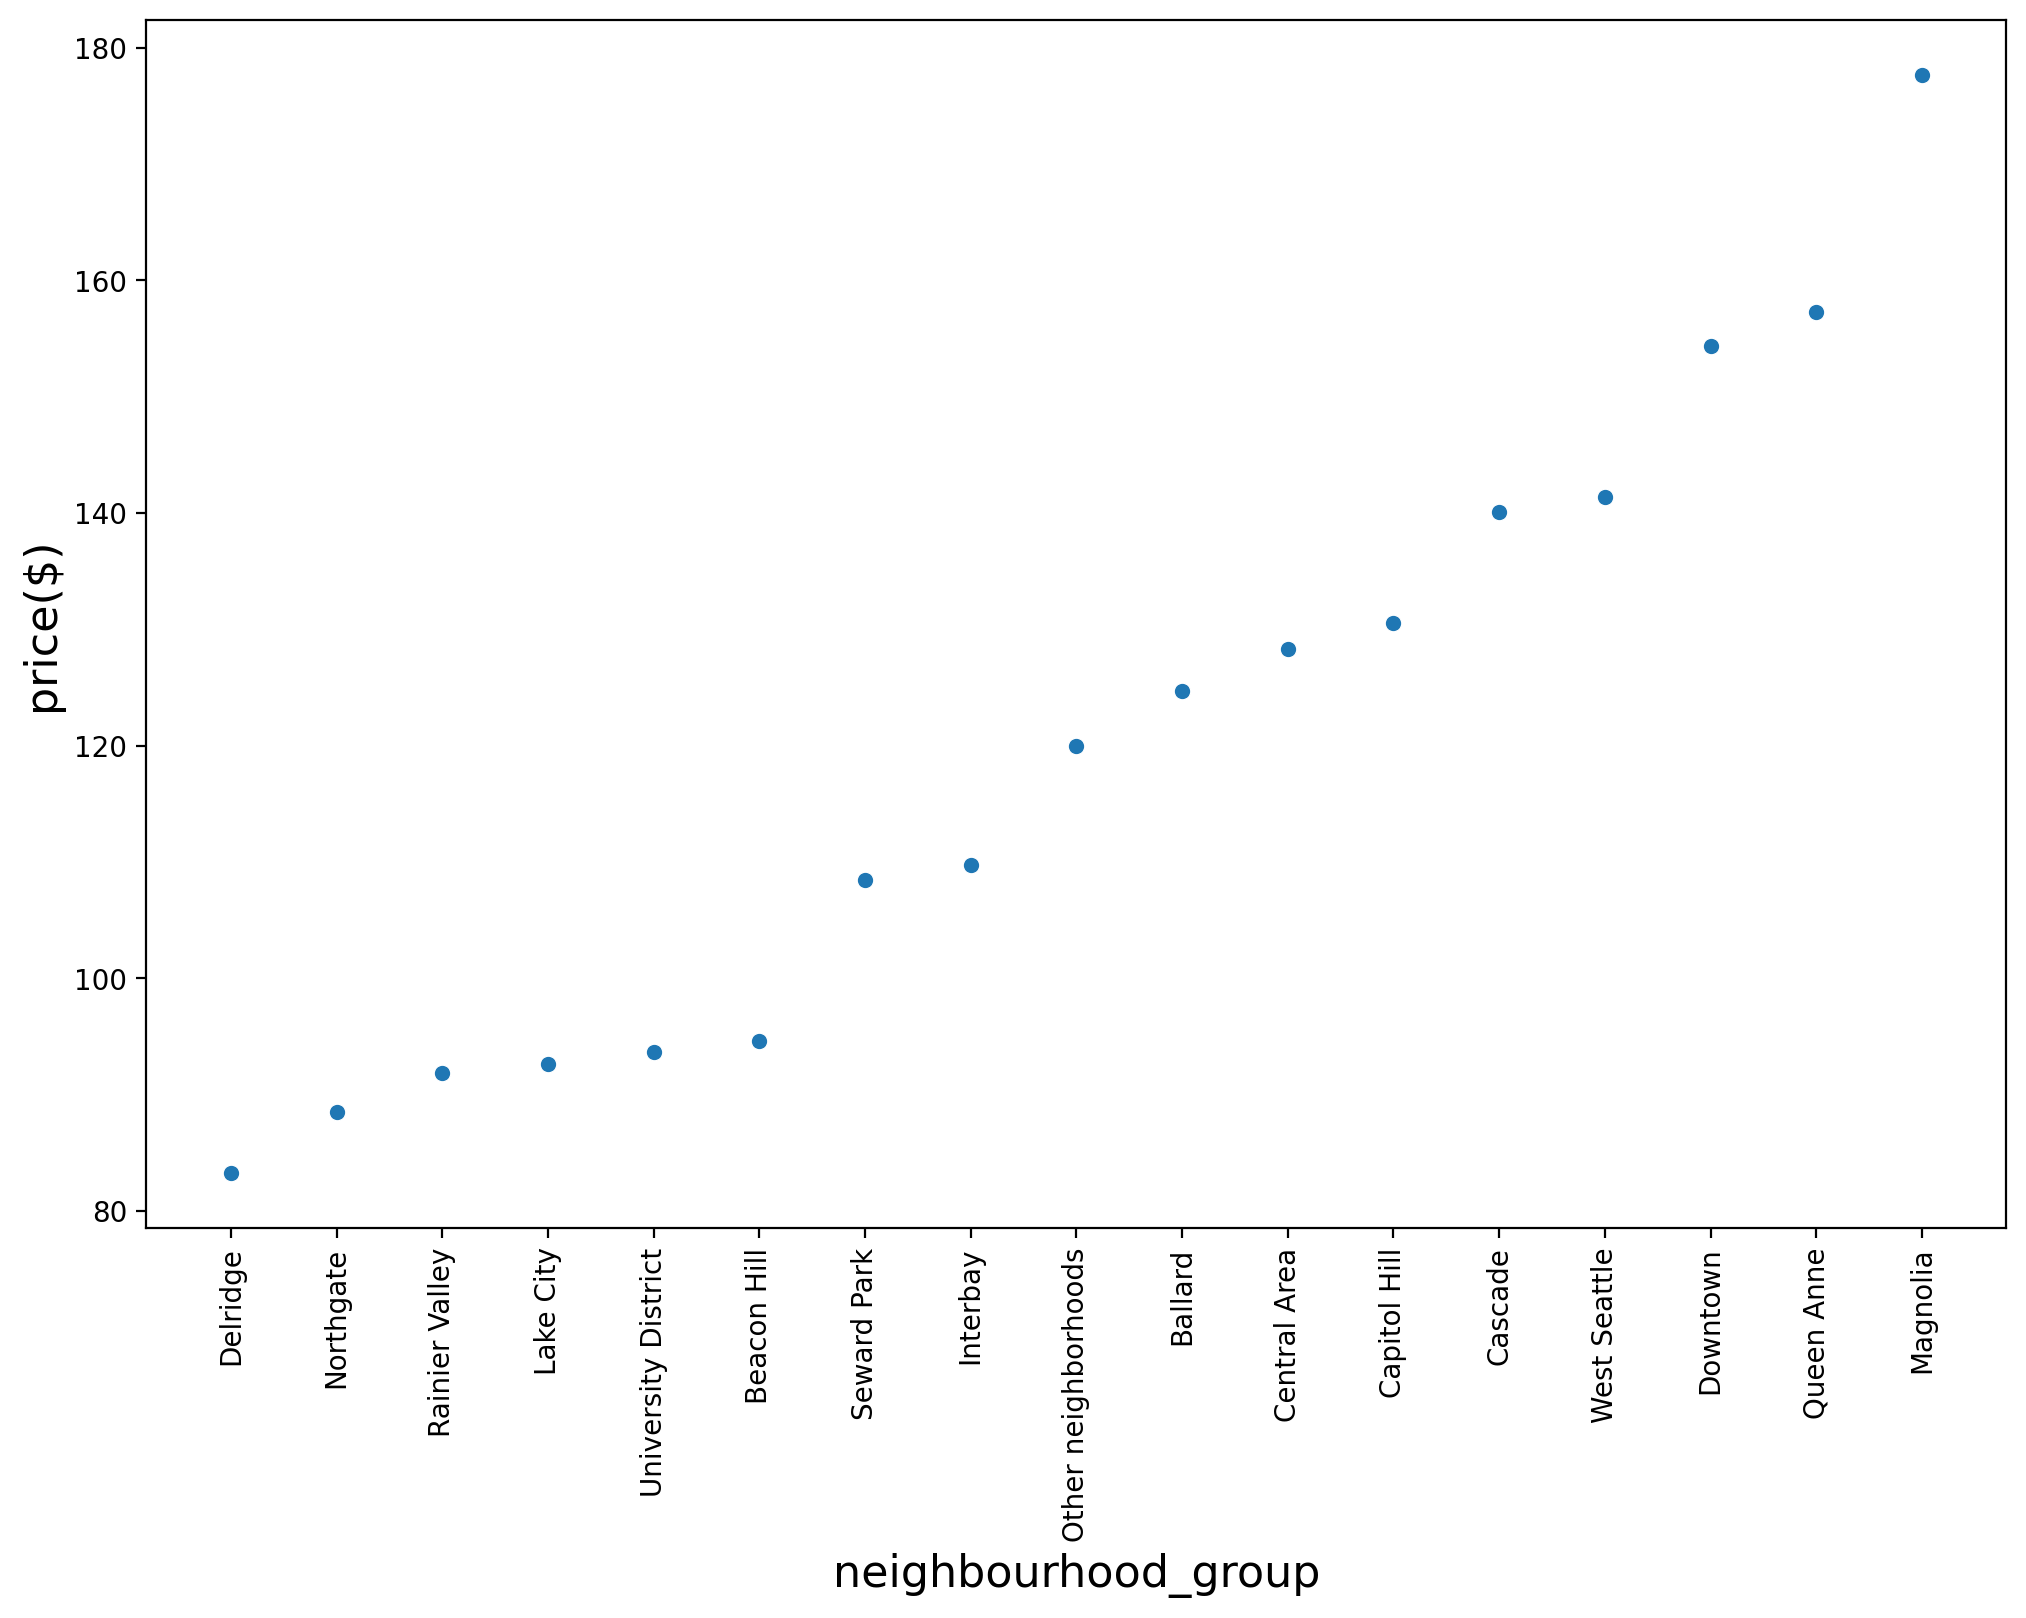

<Figure size 432x288 with 0 Axes>

In [75]:
plt.figure(figsize=(12,8),dpi=200)
ax=sns.scatterplot(x=df_price_4.index,y='price',data=df_price_4)
xlabels=df_price_4.index
ax.set_xticklabels(xlabels, rotation='vertical')
ax.set_xlabel('neighbourhood_group',fontsize=16)
ax.set_ylabel('price($)',fontsize=16)
plt.show()
plt.savefig('neighbourhood_price.png')

<ipython-input-76-612fca6a9f60>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation='vertical')


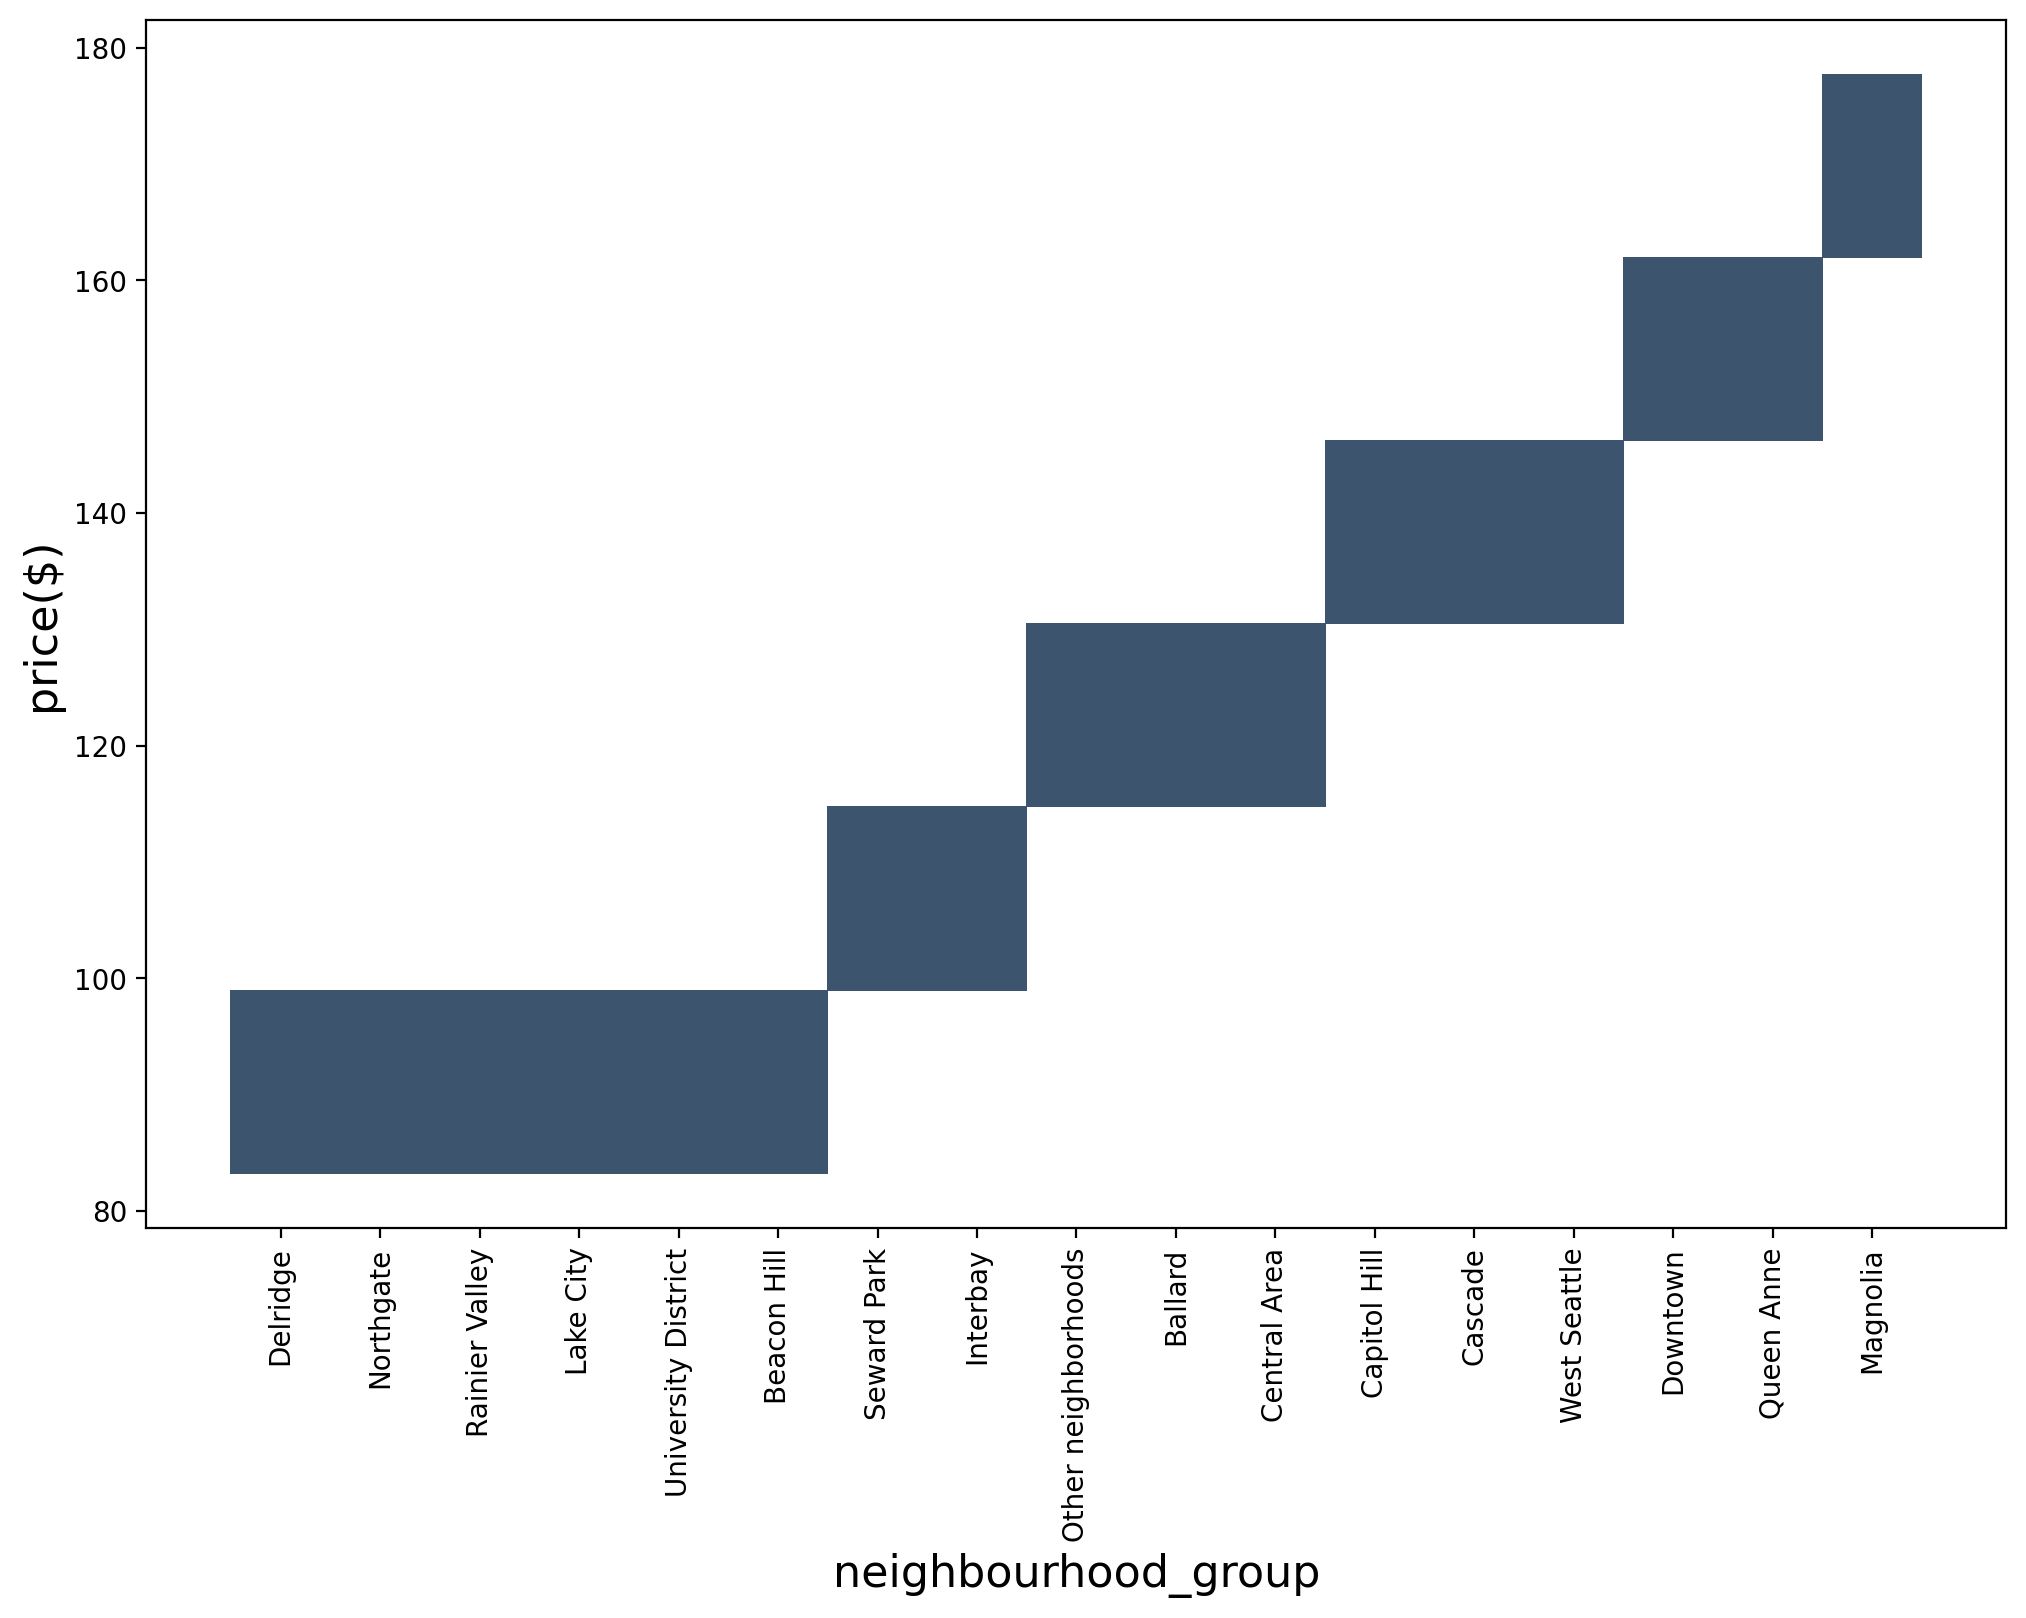

<Figure size 432x288 with 0 Axes>

In [76]:
plt.figure(figsize=(12,8),dpi=200)
ax=sns.histplot(x=df_price_4.index,y='price',data=df_price_4)
xlabels=df_price_4.index
ax.set_xticklabels(xlabels, rotation='vertical')
ax.set_xlabel('neighbourhood_group',fontsize=16)
ax.set_ylabel('price($)',fontsize=16)
plt.show()
plt.savefig('neighbourhood_price.png')

- #### The price show a large variation with the neighbourhood_group.
       1. The Top3 ranking of the highest price: No.1 Magnolia, No.2 Queen Anne, No.3 Downtown
       2. The Top3 ranking of the lowest price: No.1 Delridge, No.2 Noethgate, No.3 Rainier Valley

#### Review Scores Rating and Price

In [77]:
review_scores=df_listings[['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']]
review_scores.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
2,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92.0,9.0,9.0,10.0,10.0,9.0,9.0
5,95.0,10.0,10.0,10.0,10.0,10.0,10.0


In [78]:
review_scores.isnull().sum()

review_scores_rating           647
review_scores_accuracy         658
review_scores_cleanliness      653
review_scores_checkin          658
review_scores_communication    651
review_scores_location         655
review_scores_value            656
dtype: int64

In [79]:
fillmean = lambda col : col.fillna(col.mean())
review_scores=review_scores.apply(fillmean, axis=0)

In [80]:
review_scores.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000
2,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
3,94.538801,9.636277,9.556258,9.786641,9.809539,9.608792,9.452072
4,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
5,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [81]:
review_scores['rating']=review_scores['review_scores_rating']
review_scores['accuracy']=review_scores['review_scores_accuracy']
review_scores['cleanliness']=review_scores['review_scores_cleanliness']
review_scores['checkin']=review_scores['review_scores_checkin']
review_scores['communication']=review_scores['review_scores_communication']
review_scores['location']=review_scores['review_scores_location']
review_scores['value']=review_scores['review_scores_value']
review_scores.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,rating,accuracy,cleanliness,checkin,communication,location,value
0,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000
2,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
3,94.538801,9.636277,9.556258,9.786641,9.809539,9.608792,9.452072,94.538801,9.636277,9.556258,9.786641,9.809539,9.608792,9.452072
4,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
5,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [82]:
review_scores_2=pd.concat([review_scores['rating'],review_scores['accuracy'],review_scores['cleanliness']
                          ,review_scores['checkin'],review_scores['communication'],review_scores['location']
                          ,review_scores['value']],axis=1)

In [83]:
review_scores_2.head()

,rating,accuracy,cleanliness,checkin,communication,location,value
0,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000
2,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
3,94.538801,9.636277,9.556258,9.786641,9.809539,9.608792,9.452072
4,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
5,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


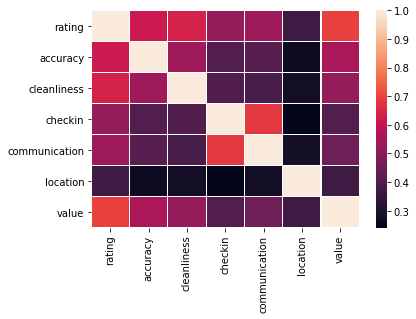

In [84]:
plt.figure()
sns.heatmap(review_scores_2.corr(), linewidths=0.2)
plt.savefig('review_scores_corr_2.png')

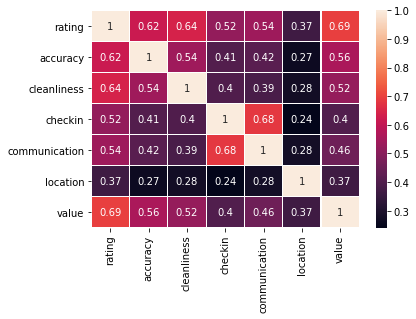

In [85]:
plt.figure()
sns.heatmap(review_scores_2.corr(), linewidths=0.2,annot=True)
plt.savefig('review_scores_corr_3.png')

- #### In the review scores, the total rating has high correlation with the value and the cleanliness. 

In [86]:
review_scores_3=pd.concat([df_price_2,review_scores['rating'],review_scores['accuracy'],review_scores['cleanliness']
                          ,review_scores['checkin'],review_scores['communication'],review_scores['location']
                          ,review_scores['value']],axis=1)

In [87]:
review_scores_3.head()

,neighbourhood_group_cleansed,price,rating,accuracy,cleanliness,checkin,communication,location,value
0,Queen Anne,85.0,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000
2,Queen Anne,975.0,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
3,Queen Anne,100.0,94.538801,9.636277,9.556258,9.786641,9.809539,9.608792,9.452072
4,Queen Anne,450.0,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
5,Queen Anne,120.0,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [88]:
review_scores_4=review_scores_3.groupby('neighbourhood_group_cleansed').mean()

In [89]:
review_scores_4

,price,rating,accuracy,cleanliness,checkin,communication,location,value
neighbourhood_group_cleansed,,,,,,,,
Ballard,124.682609,95.373633,9.715401,9.650355,9.883068,9.908491,9.741414,9.550986
Beacon Hill,94.669492,94.085441,9.597832,9.477490,9.828810,9.823246,9.162135,9.371026
Capitol Hill,130.592593,94.251590,9.584399,9.449869,9.779090,9.803564,9.782627,9.368296
Cascade,140.101124,93.021699,9.441243,9.341013,9.807634,9.813808,9.579899,9.279210
Central Area,128.338753,95.810136,9.744753,9.641769,9.827458,9.846821,9.505256,9.555706
Delridge,83.278481,95.627129,9.808961,9.706172,9.949531,9.940931,9.272444,9.637076
Downtown,154.405660,94.039380,9.576832,9.565508,9.669808,9.746992,9.747265,9.298969
Interbay,109.727273,93.916146,9.661141,9.737501,9.688480,9.783553,9.201599,9.627649
Lake City,92.671642,94.401893,9.716404,9.539087,9.830643,9.819477,9.323832,9.551833


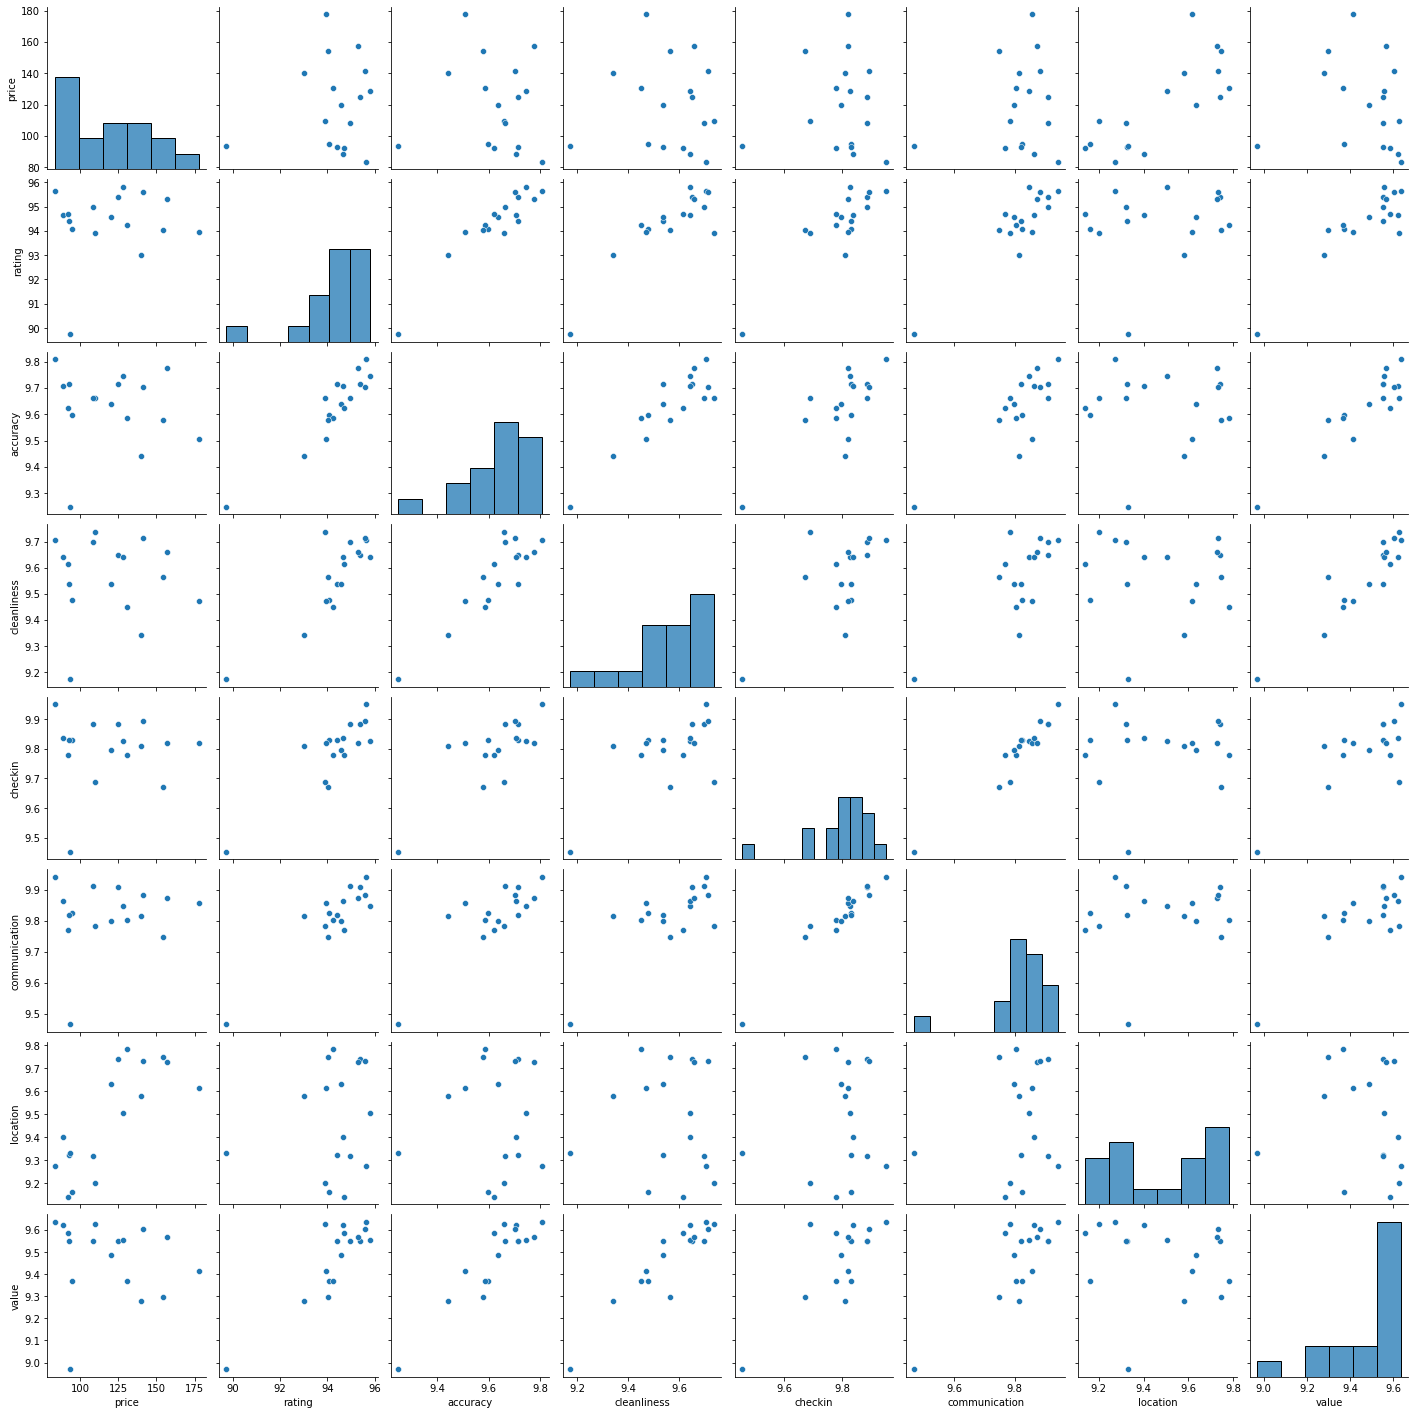

In [90]:
sns.pairplot(data=review_scores_4)

<AxesSubplot:ylabel='neighbourhood_group_cleansed'>

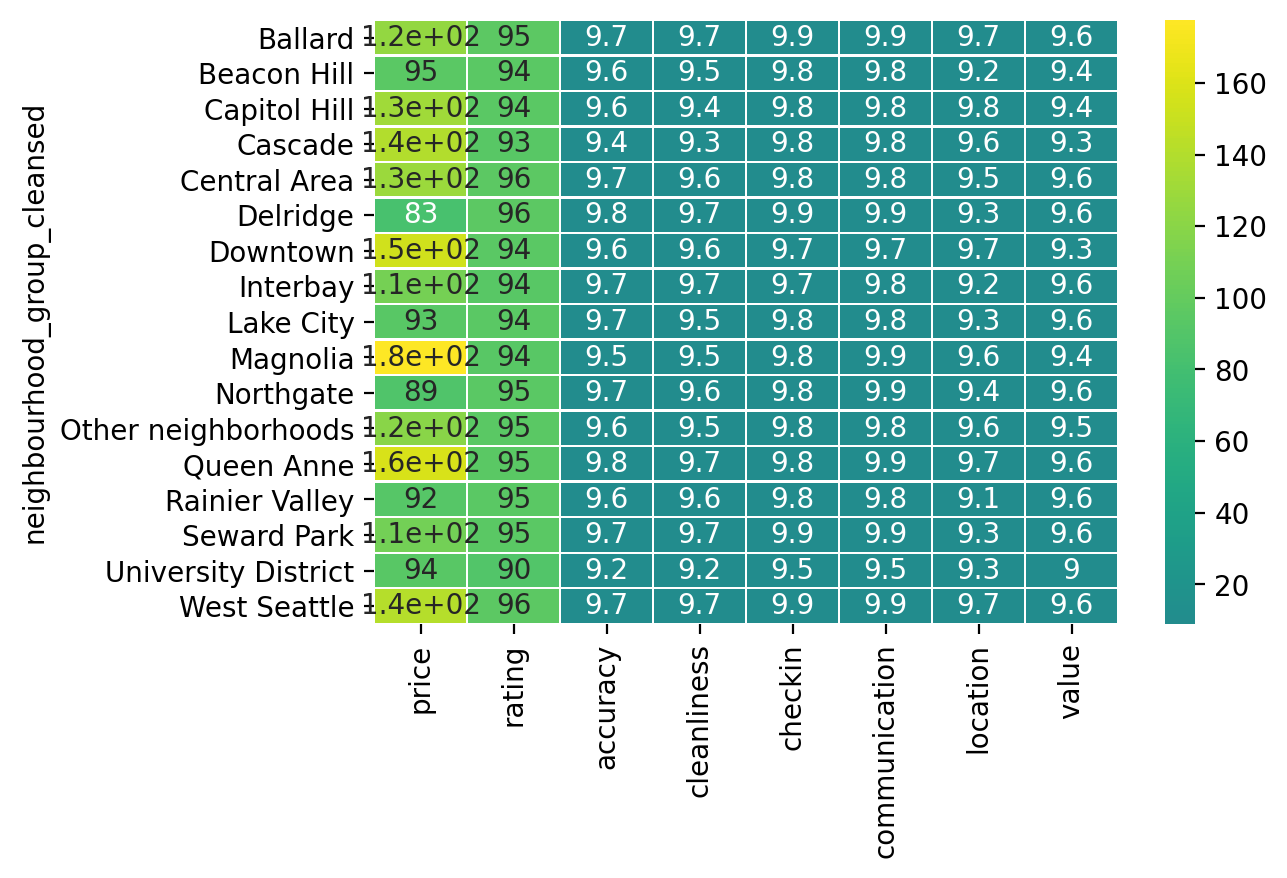

In [91]:
plt.figure(dpi=200)
sns.heatmap(data=review_scores_4,linewidth=0.5,annot=True,
           cmap='viridis',center=15)

In [92]:
review_scores_5=pd.concat([df_price_2,review_scores['rating']],axis=1)
review_scores_5.head()

,neighbourhood_group_cleansed,price,rating
0,Queen Anne,85.0,95.000000
2,Queen Anne,975.0,97.000000
3,Queen Anne,100.0,94.538801
4,Queen Anne,450.0,92.000000
5,Queen Anne,120.0,95.000000


In [93]:
review_scores_6=review_scores_5.groupby('neighbourhood_group_cleansed').mean()
review_scores_6.head()

,price,rating
neighbourhood_group_cleansed,,
Ballard,124.682609,95.373633
Beacon Hill,94.669492,94.085441
Capitol Hill,130.592593,94.251590
Cascade,140.101124,93.021699
Central Area,128.338753,95.810136


<AxesSubplot:ylabel='neighbourhood_group_cleansed'>

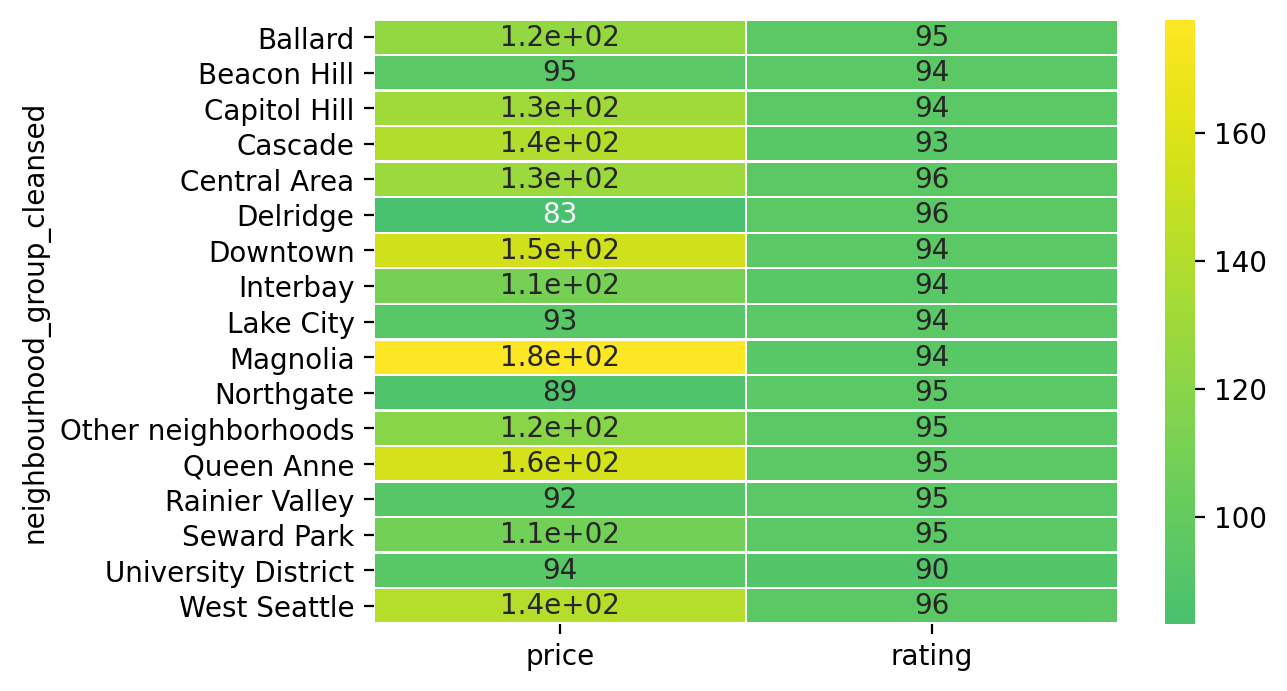

In [94]:
plt.figure(dpi=200)
sns.heatmap(data=review_scores_6,linewidth=0.5,annot=True,
           cmap='viridis',center=15)

<Figure size 1200x1200 with 0 Axes>

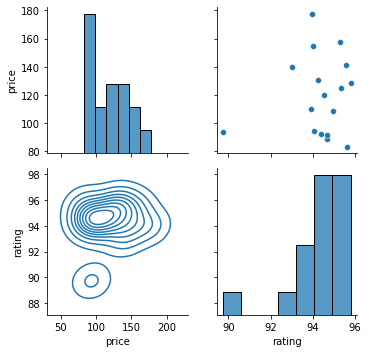

<Figure size 432x288 with 0 Axes>

In [95]:
plt.figure(figsize=(6,6),dpi=200)
g=sns.PairGrid(data=review_scores_6,palette='Set2')
g=g.map_upper(sns.scatterplot)
g=g.map_diag(sns.histplot) 
g=g.map_lower(sns.kdeplot)
g=g.add_legend()
plt.show()
plt.savefig('neighbourhood_price_review_scores.png')

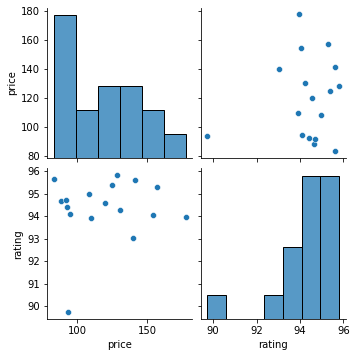

In [96]:
sns.pairplot(data=review_scores_6)

- #### There is not a clear correlation of the review scores rating and the price. The oveeall review scores rating show a high level.

#### Property and Price

In [97]:
df_listings.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_verifications', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_pictur

In [98]:
df_property = df_listings[['property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities']]
df_property.head()

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities
0,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
2,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
5,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises..."


In [99]:
df_property.isnull().sum()

property_type     1
room_type         0
accommodates      0
bathrooms        16
bedrooms          6
beds              1
bed_type          0
amenities         0
dtype: int64

In [100]:
df_property.shape

(3817, 8)

In [101]:
df_property.dropna(how='any',inplace=True)

<ipython-input-101-64e832886ab3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_property.dropna(how='any',inplace=True)


In [102]:
df_property.isnull().sum()

property_type    0
room_type        0
accommodates     0
bathrooms        0
bedrooms         0
beds             0
bed_type         0
amenities        0
dtype: int64

In [103]:
df_property_2=pd.concat([review_scores_3,df_property],axis=1)

In [104]:
df_property_2.head()

,neighbourhood_group_cleansed,price,rating,accuracy,cleanliness,checkin,communication,location,value,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities
0,Queen Anne,85.0,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
2,Queen Anne,975.0,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,House,Entire home/apt,11.0,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,Queen Anne,100.0,94.538801,9.636277,9.556258,9.786641,9.809539,9.608792,9.452072,Apartment,Entire home/apt,3.0,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,Queen Anne,450.0,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,House,Entire home/apt,6.0,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
5,Queen Anne,120.0,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,House,Private room,2.0,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises..."


In [105]:
df_property_3=df_property_2.groupby('property_type').mean()
df_property_3

,price,rating,accuracy,cleanliness,checkin,communication,location,value,accommodates,bathrooms,bedrooms,beds
property_type,,,,,,,,,,,,
Apartment,122.895698,94.078883,9.607368,9.533542,9.756279,9.793925,9.670765,9.375920,3.101355,1.096641,1.032999,1.529758
Bed & Breakfast,112.054054,95.376400,9.621596,9.597806,9.909542,9.862295,9.559371,9.431697,2.216216,1.648649,1.000000,1.351351
Boat,282.375000,95.202050,9.693139,9.708597,9.544991,9.803577,9.353297,9.419527,3.125000,1.750000,1.750000,2.250000
Bungalow,115.615385,96.704247,9.888085,9.863464,9.934351,9.864473,9.725782,9.677561,2.846154,1.192308,0.615385,1.538462
Cabin,104.666667,96.238095,9.904762,9.809524,9.904762,9.904762,9.619048,9.809524,2.666667,1.000000,0.857143,1.476190
Camper/RV,120.461538,95.432031,9.762218,9.743752,9.950763,9.956047,9.448183,9.488940,2.615385,0.846154,0.692308,1.692308
Chalet,135.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,1.000000,1.000000,3.000000
Condominium,151.109890,95.130260,9.721257,9.628985,9.748272,9.844064,9.791233,9.465908,3.406593,1.225275,1.241758,1.692308
Dorm,39.500000,90.000000,9.000000,9.000000,9.000000,9.000000,10.000000,9.500000,8.000000,4.000000,1.000000,8.000000


In [106]:
df_property_4=df_property_3.sort_values('price')

<ipython-input-107-26587eb5793d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation='vertical')


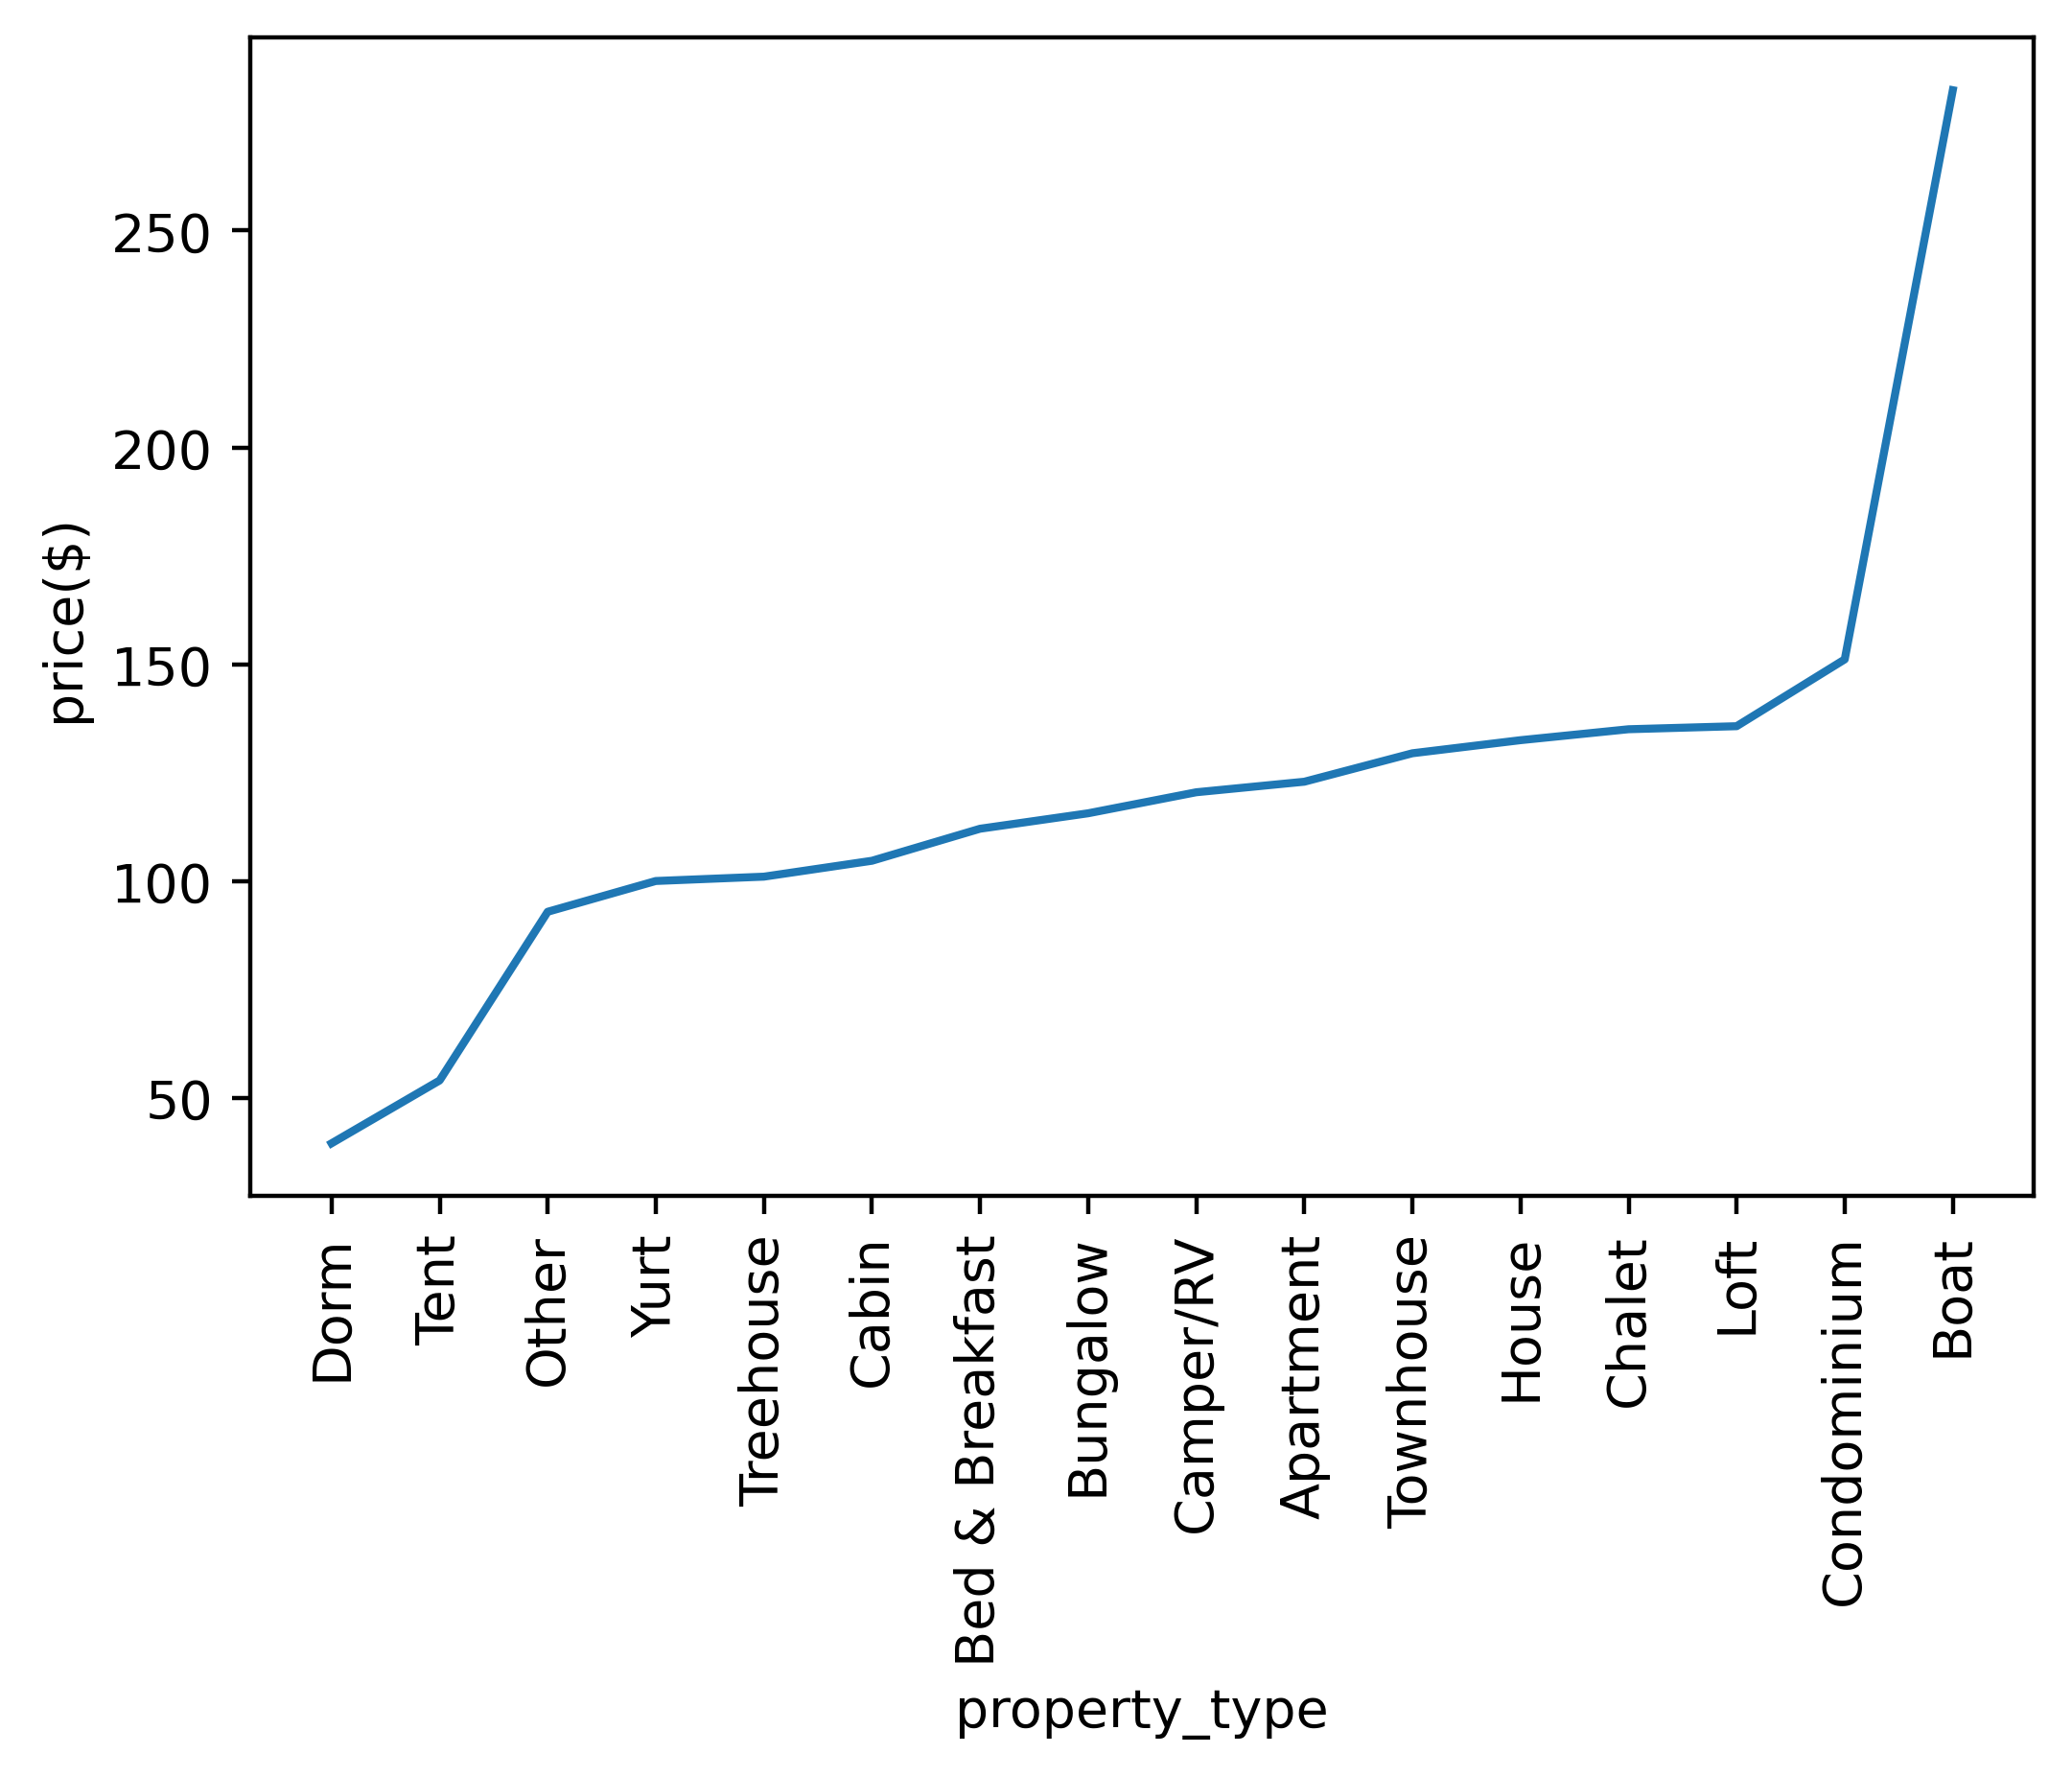

In [107]:
plt.figure(figsize=(6,4),dpi=400)
ax=sns.lineplot(x=df_property_4.index,y='price',data=df_property_4)
xlabels=df_property_4.index
ax.set_xticklabels(xlabels, rotation='vertical')
ax.set_xlabel('property_type',fontsize=10)
ax.set_ylabel('price($)',fontsize=10)
plt.savefig('property and price_2.png')



<ipython-input-108-3a7cd6bf4b26>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation='vertical')


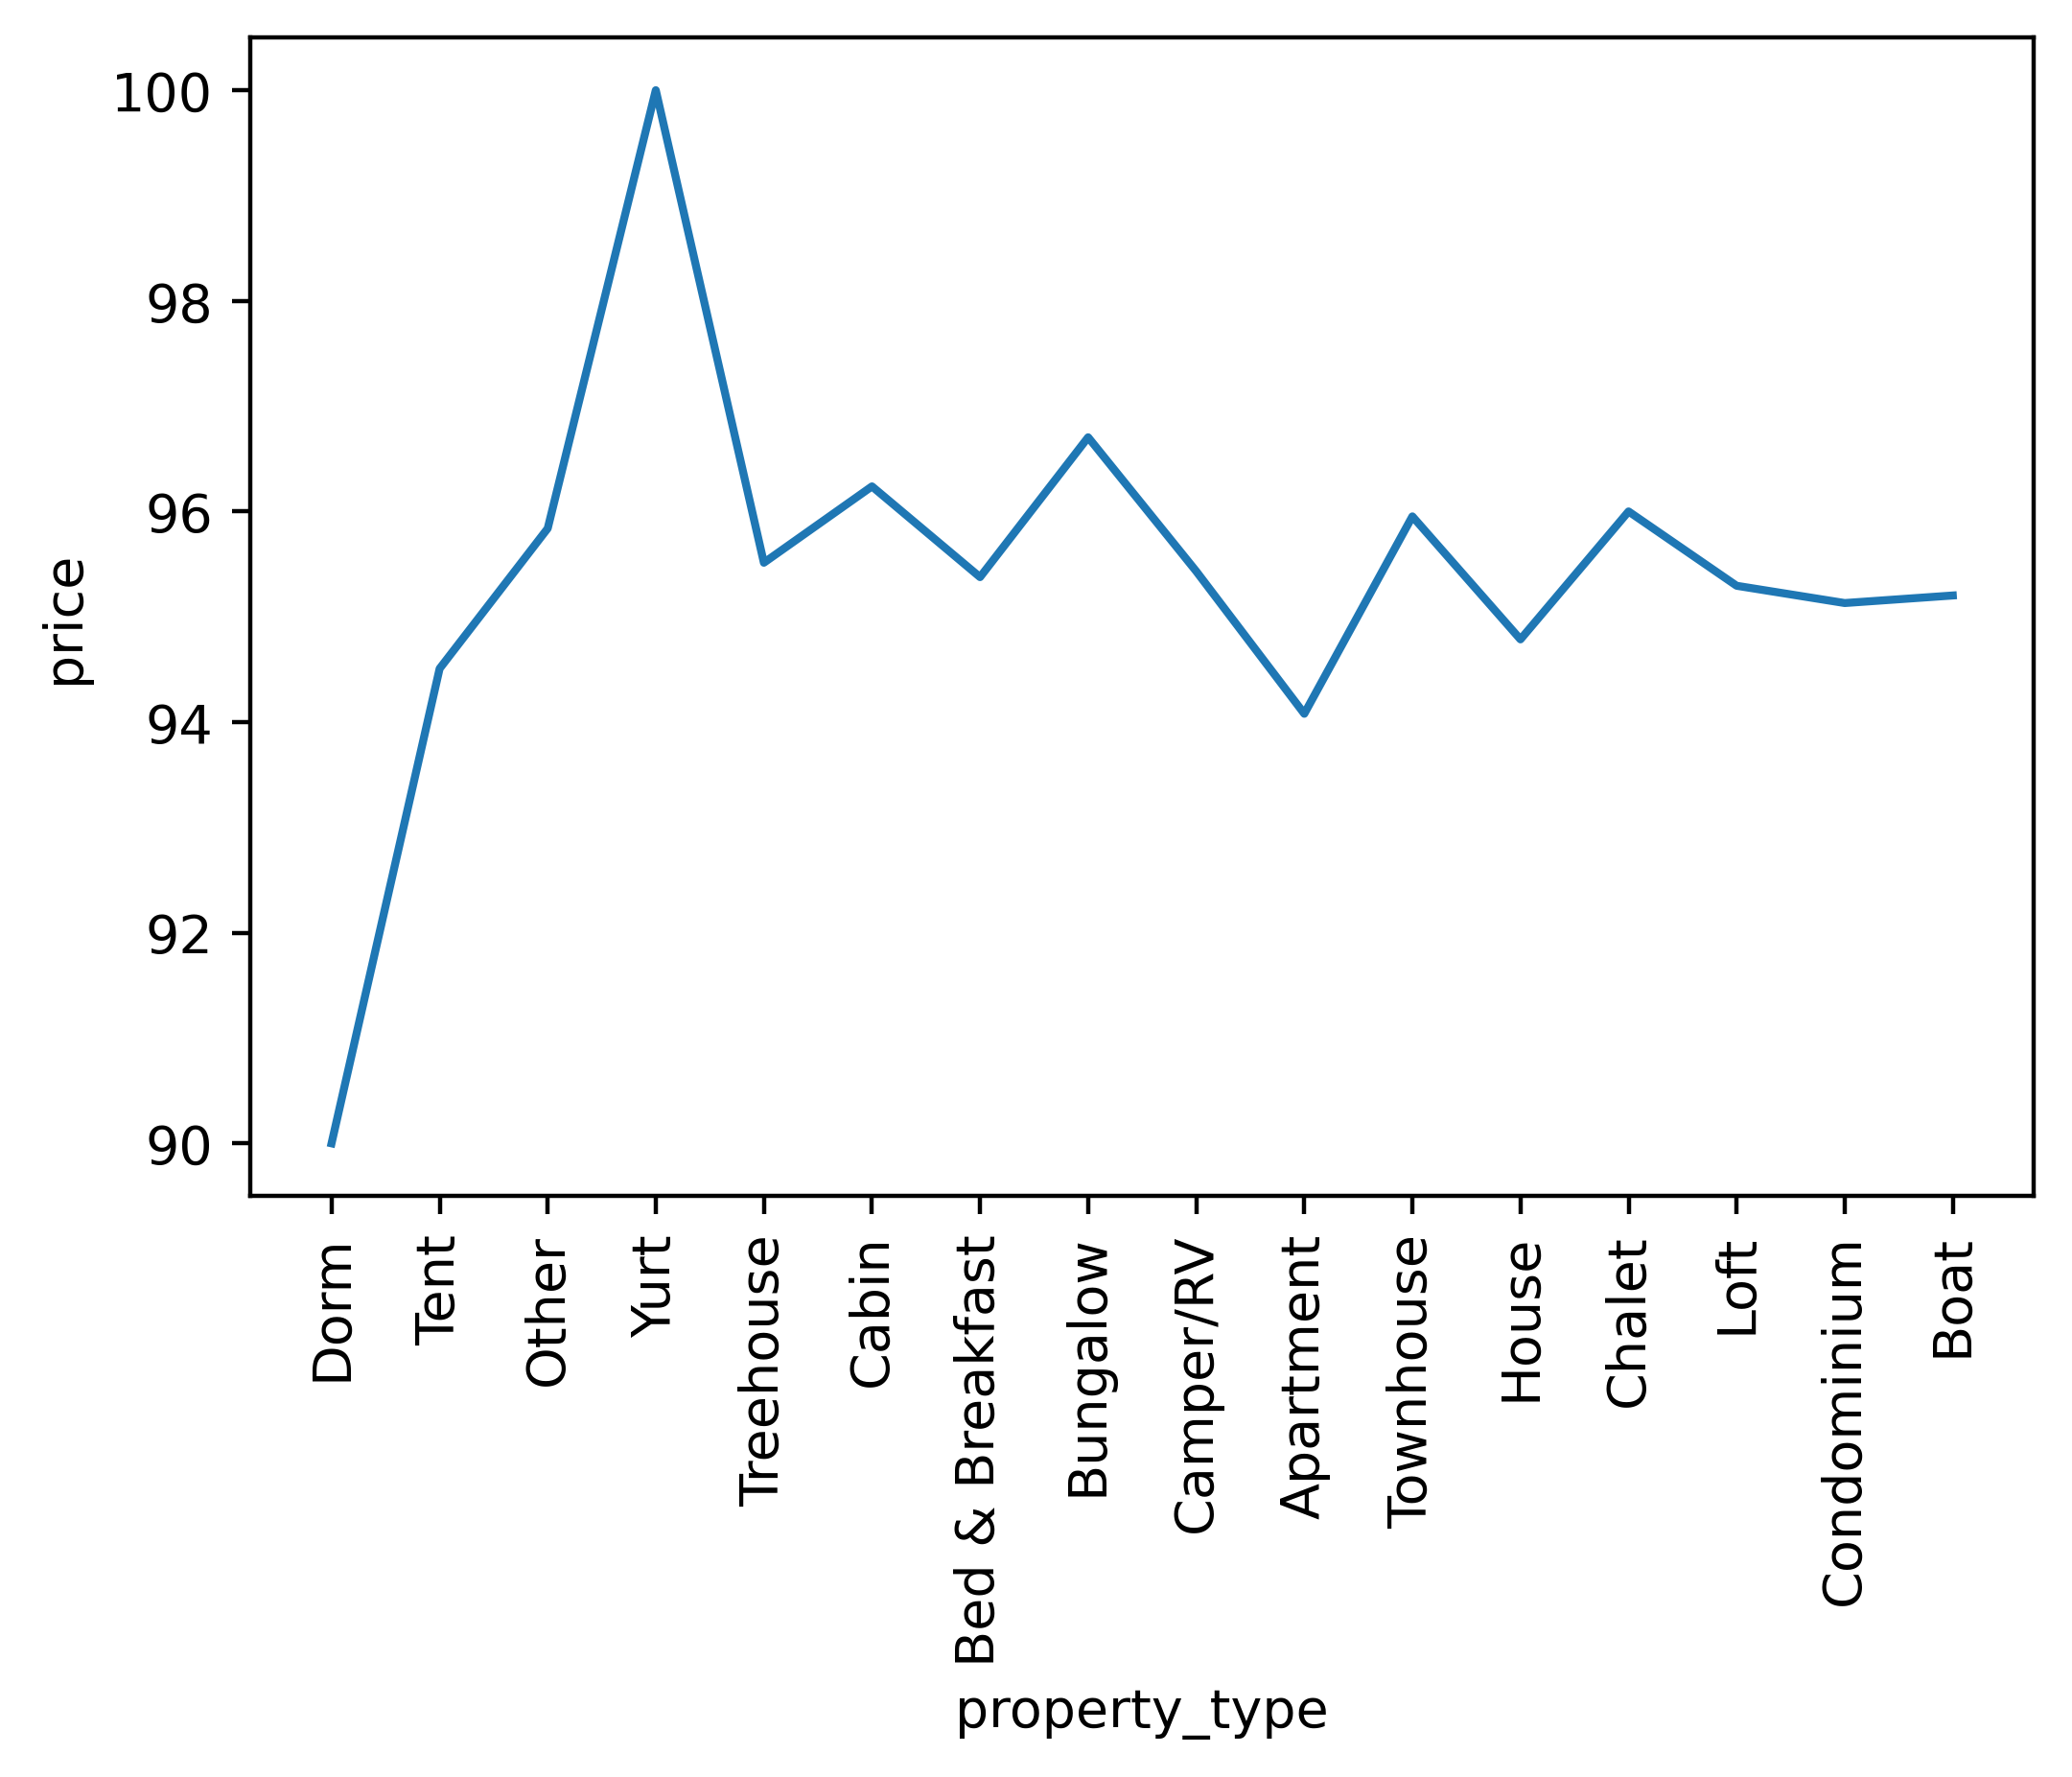

In [108]:
plt.figure(figsize=(6,4),dpi=400)
ax=sns.lineplot(x=df_property_4.index,y='rating',data=df_property_4)
xlabels=df_property_4.index
ax.set_xticklabels(xlabels, rotation='vertical')
ax.set_xlabel('property_type',fontsize=10)
ax.set_ylabel('price',fontsize=10)
plt.savefig('property and review scores.png')

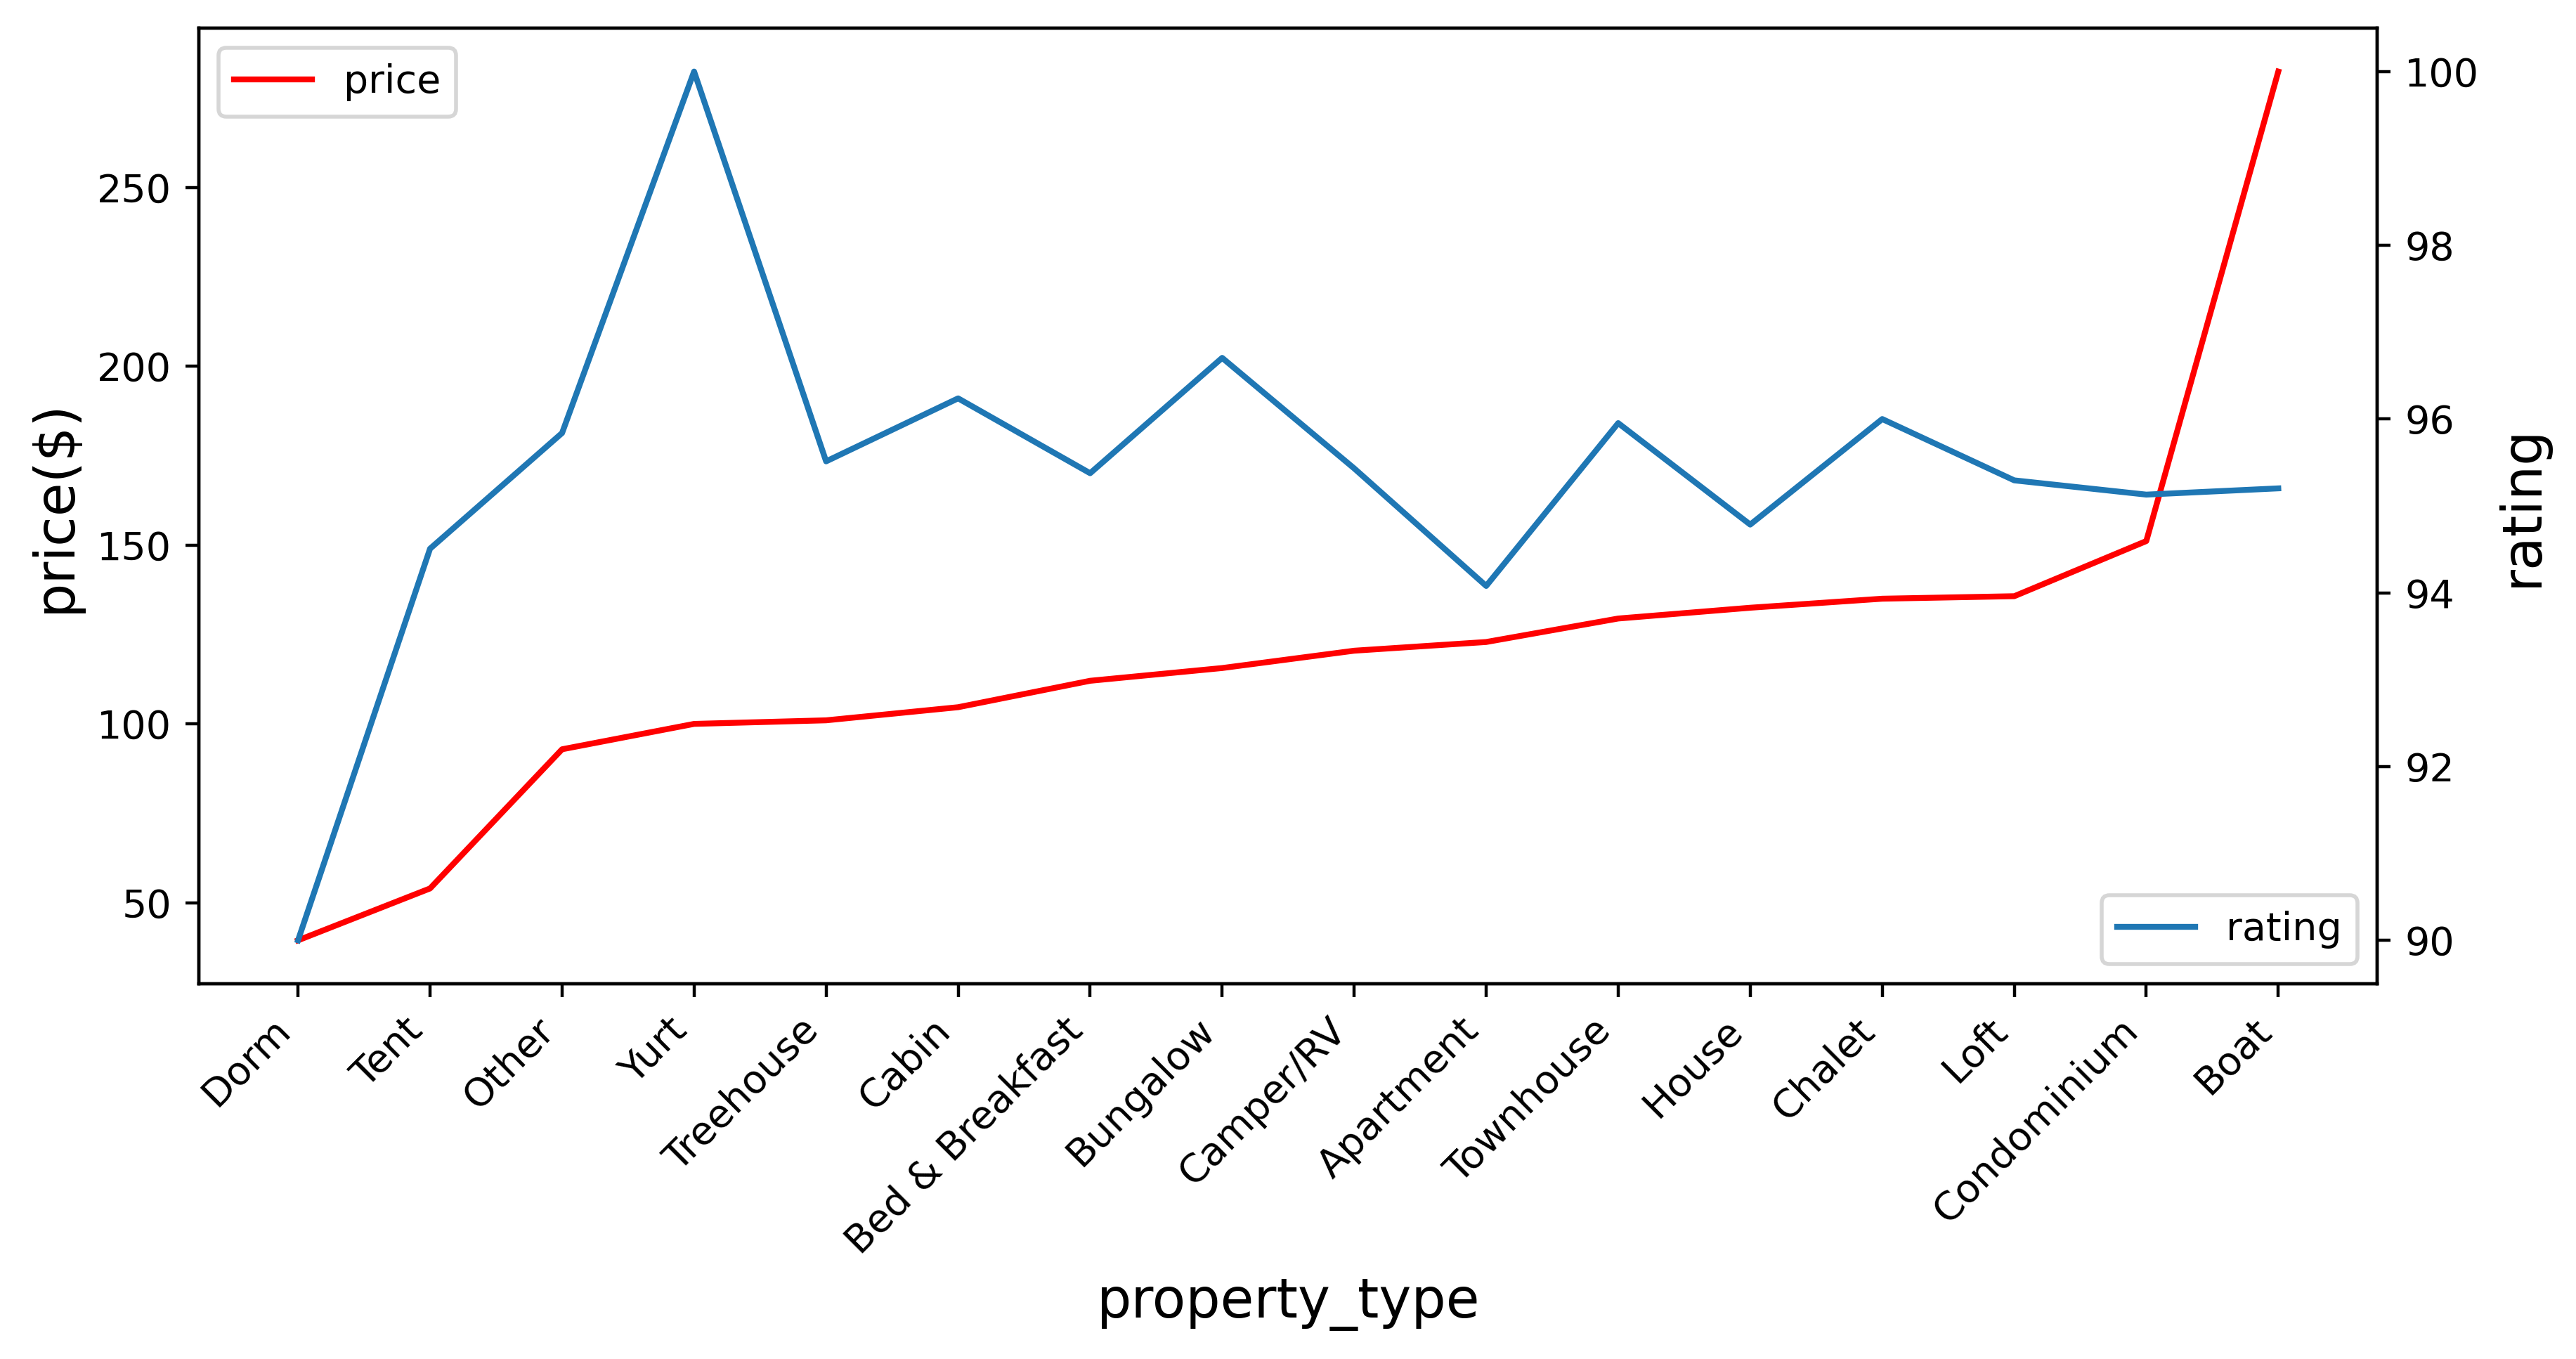

<Figure size 432x288 with 0 Axes>

In [109]:
fig=plt.figure(figsize=(10,5),dpi=400)
ax1=fig.add_subplot(111)

y1=df_property_4['price']
y2=df_property_4['rating']
x=df_property_4.index

ax1.plot(x,y1,'r',label='price')
ax2=ax1.twinx()
ax2.plot(x,y2,label='rating')
fig.autofmt_xdate(rotation=45)

ax1.set_xlabel('property_type',size=14)
ax1.set_ylabel('price($)',size=14)
ax2.set_ylabel('rating',size=14)

ax1.legend(loc='best')
ax2.legend(loc='lower right')

plt.show()
plt.savefig('property_price_rating.png')


- #### The price of boat is twice to 7 times higher than the other property types. Yurt has the highest review scores rating with a reasonable price  

In [110]:
df_property_5=df_property_2.groupby('room_type').mean()
df_property_5

,price,rating,accuracy,cleanliness,checkin,communication,location,value,accommodates,bathrooms,bedrooms,beds
room_type,,,,,,,,,,,,
Entire home/apt,156.053090,94.490303,9.641032,9.581952,9.781311,9.809092,9.632828,9.425719,4.016640,1.307250,1.463154,2.035658
Private room,74.875108,94.779632,9.646125,9.547009,9.818035,9.824436,9.556486,9.517807,2.061578,1.158283,1.000000,1.130095
Shared room,47.547009,93.508291,9.423446,9.110312,9.627801,9.728534,9.631014,9.416700,1.675214,1.243590,1.000000,1.273504


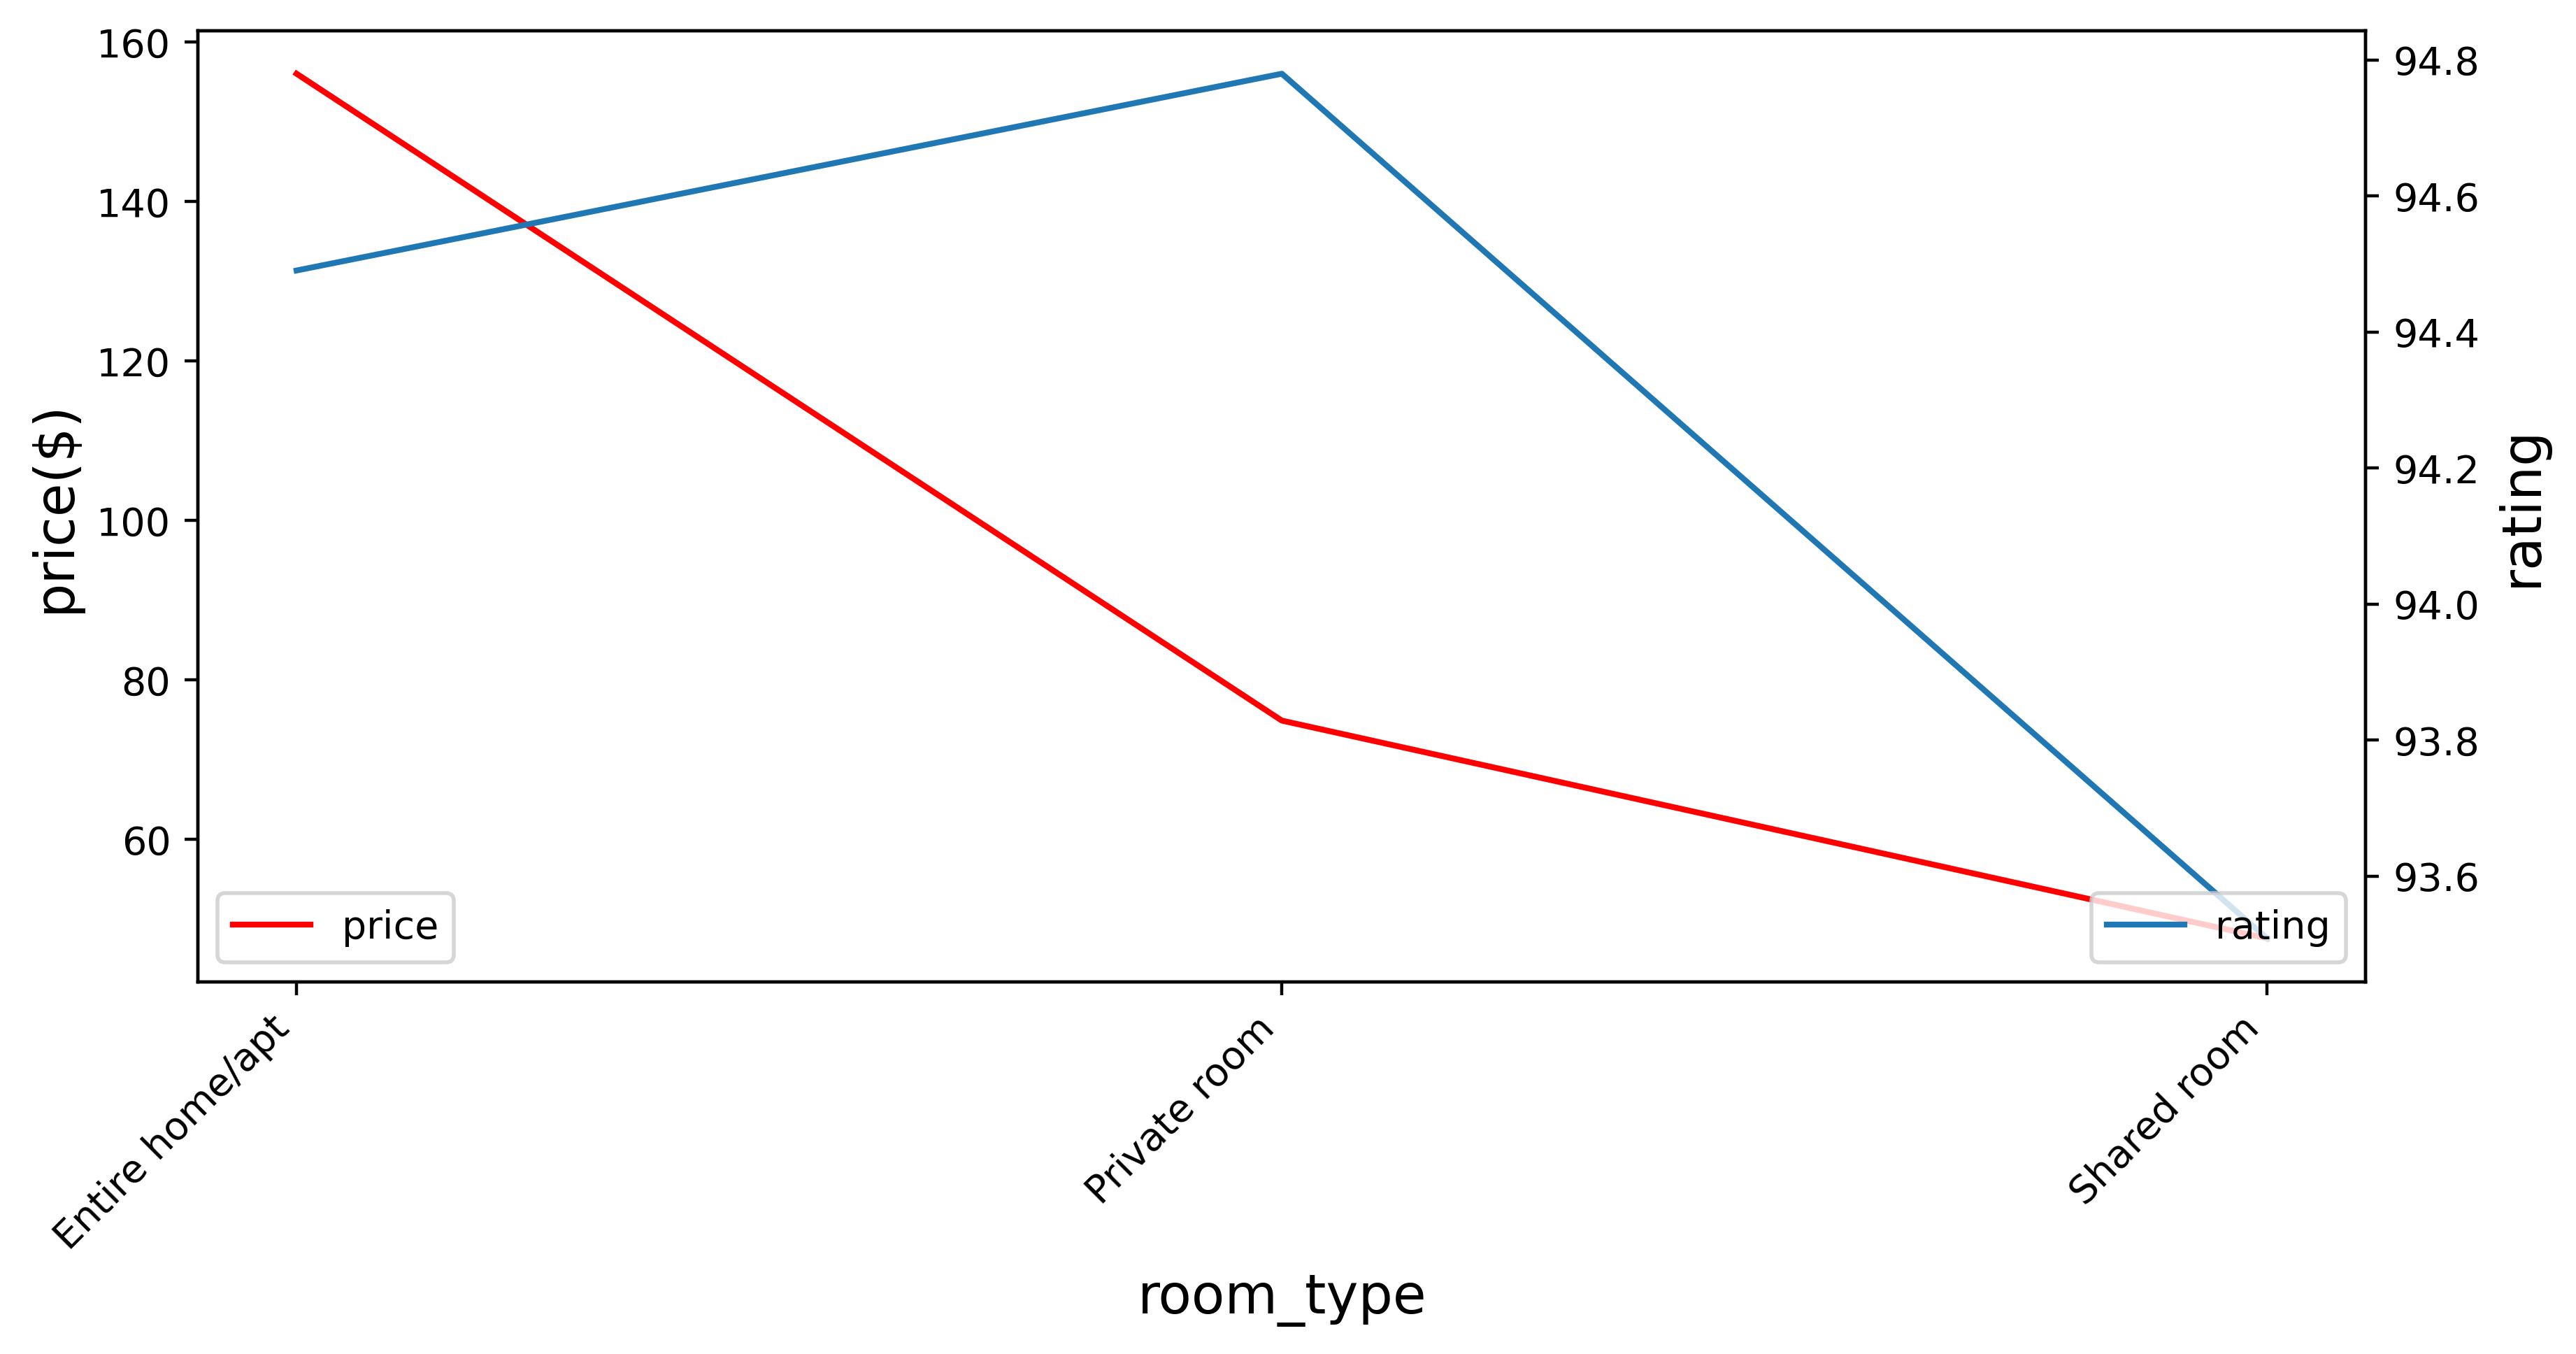

<Figure size 432x288 with 0 Axes>

In [111]:
fig=plt.figure(figsize=(10,5),dpi=400)
ax1=fig.add_subplot(111)

y1=df_property_5['price']
y2=df_property_5['rating']
x=df_property_5.index

ax1.plot(x,y1,'r',label='price')
ax2=ax1.twinx()
ax2.plot(x,y2,label='rating')
fig.autofmt_xdate(rotation=45)

ax1.set_xlabel('room_type',size=14)
ax1.set_ylabel('price($)',size=14)
ax2.set_ylabel('rating',size=14)

ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

plt.show()
plt.savefig('room_price_rating.png')

- #### About the room type, share room has the lowest price and review scores rating. Private room has the median price but the highest review scores rating. Entire home/apt has the highest price but a lower review scores rating than the Private home.

### 4. Make a LinearRegression Model

### Pickup four variables related to the host performance and four variables related to the convenient factors.

In [113]:
df_lr=df_listings[['host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_verifications',
       'neighbourhood','is_location_exact','instant_bookable', 'cancellation_policy']]

In [114]:
df_lr_2=pd.concat([df_lr, df_price['price']],axis=1)

In [115]:
df_lr_2.head()

,host_response_time,host_response_rate,host_is_superhost,host_verifications,neighbourhood,is_location_exact,instant_bookable,cancellation_policy,price
0,within a few hours,96%,f,"['email', 'phone', 'reviews', 'kba']",Queen Anne,t,f,moderate,85.0
2,within a few hours,67%,f,"['email', 'phone', 'google', 'reviews', 'jumio']",Queen Anne,t,f,strict,975.0
3,NaN,NaN,f,"['email', 'phone', 'facebook', 'reviews', 'jum...",Queen Anne,t,f,flexible,100.0
4,within an hour,100%,f,"['email', 'phone', 'facebook', 'reviews', 'kba']",Queen Anne,t,f,strict,450.0
5,NaN,NaN,f,"['email', 'phone', 'facebook', 'reviews', 'kba']",Queen Anne,t,f,strict,120.0


In [116]:
df_lr_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   host_response_time   3294 non-null   object 
 1   host_response_rate   3294 non-null   object 
 2   host_is_superhost    3815 non-null   object 
 3   host_verifications   3817 non-null   object 
 4   neighbourhood        3401 non-null   object 
 5   is_location_exact    3817 non-null   object 
 6   instant_bookable     3817 non-null   object 
 7   cancellation_policy  3817 non-null   object 
 8   price                3817 non-null   float64
dtypes: float64(1), object(8)
memory usage: 298.2+ KB


In [117]:
df_lr_2.isnull().sum()

host_response_time     523
host_response_rate     523
host_is_superhost        2
host_verifications       0
neighbourhood          416
is_location_exact        0
instant_bookable         0
cancellation_policy      0
price                    0
dtype: int64

In [118]:
df_lr_2['host_response_time'].mode()[0]

'within an hour'

In [119]:
df_lr_2['host_response_time']=df_lr_2['host_response_time'].fillna('within an hour')

In [120]:
df_lr_2['host_response_rate'].mode()[0]

'100%'

In [121]:
df_lr_2['host_response_rate']=df_lr_2['host_response_rate'].fillna('100%')

In [122]:
df_lr_2['host_is_superhost'].mode()[0]

'f'

In [123]:
df_lr_2['host_is_superhost']=df_lr_2['host_is_superhost'].fillna('f')

In [124]:
df_lr_3=df_lr_2.dropna(how='any')

In [125]:
df_lr_3.head()

,host_response_time,host_response_rate,host_is_superhost,host_verifications,neighbourhood,is_location_exact,instant_bookable,cancellation_policy,price
0,within a few hours,96%,f,"['email', 'phone', 'reviews', 'kba']",Queen Anne,t,f,moderate,85.0
2,within a few hours,67%,f,"['email', 'phone', 'google', 'reviews', 'jumio']",Queen Anne,t,f,strict,975.0
3,within an hour,100%,f,"['email', 'phone', 'facebook', 'reviews', 'jum...",Queen Anne,t,f,flexible,100.0
4,within an hour,100%,f,"['email', 'phone', 'facebook', 'reviews', 'kba']",Queen Anne,t,f,strict,450.0
5,within an hour,100%,f,"['email', 'phone', 'facebook', 'reviews', 'kba']",Queen Anne,t,f,strict,120.0


In [126]:
df_lr_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3401 entries, 0 to 3817
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   host_response_time   3401 non-null   object 
 1   host_response_rate   3401 non-null   object 
 2   host_is_superhost    3401 non-null   object 
 3   host_verifications   3401 non-null   object 
 4   neighbourhood        3401 non-null   object 
 5   is_location_exact    3401 non-null   object 
 6   instant_bookable     3401 non-null   object 
 7   cancellation_policy  3401 non-null   object 
 8   price                3401 non-null   float64
dtypes: float64(1), object(8)
memory usage: 265.7+ KB


In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

variables: ['host_response_time', 'host_response_rate','host_is_superhost', 'host_verifications',
       'neighbourhood','is_location_exact','instant_bookable', 'cancellation_policy']

In [177]:
X=df_lr_3[['host_response_time', 'host_response_rate','host_is_superhost', 'host_verifications',
       'neighbourhood','is_location_exact','instant_bookable', 'cancellation_policy']]
y=df_lr_3['price']

In [178]:
dummy_cols_df = pd.get_dummies(df_lr_3, dummy_na=True)

In [179]:
dummy_cols_df

,price,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_response_rate_100%,host_response_rate_17%,host_response_rate_25%,host_response_rate_30%,...,is_location_exact_f,is_location_exact_t,is_location_exact_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan
0,85.0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,975.0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,100.0,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4,450.0,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,120.0,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,65.0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3812,95.0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3813,359.0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3814,79.0,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [180]:
X=dummy_cols_df.drop('price',axis=1)
y=dummy_cols_df['price']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [182]:
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression(normalize=True)

In [183]:
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [184]:
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [185]:
test_score

-3.302094088468813e+28

In [186]:
train_score

0.16904817630297675

variables: ['host_response_time', 'host_response_rate','host_is_superhost', 'host_verifications']

In [187]:
X=df_lr_3[['host_response_time', 'host_response_rate','host_is_superhost', 'host_verifications']]
y=df_lr_3['price']

In [188]:
dummy_cols_df = pd.get_dummies(df_lr_3, dummy_na=True)

In [189]:
dummy_cols_df

,price,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_response_rate_100%,host_response_rate_17%,host_response_rate_25%,host_response_rate_30%,...,is_location_exact_f,is_location_exact_t,is_location_exact_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan
0,85.0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,975.0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,100.0,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4,450.0,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,120.0,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,65.0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3812,95.0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3813,359.0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3814,79.0,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [190]:
X=dummy_cols_df.drop('price',axis=1)
y=dummy_cols_df['price']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [192]:
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression(normalize=True)

In [193]:
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [194]:
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [195]:
test_score

-1.7924694277766893e+28

In [196]:
train_score

0.2301314343479891

variables:'host_is_superhost', 'host_verifications',
       'neighbourhood', 'cancellation_policy'

In [197]:
X=df_lr_3[['host_is_superhost', 'host_verifications',
       'neighbourhood', 'cancellation_policy']]
y=df_lr_3['price']

In [198]:
dummy_cols_df = pd.get_dummies(df_lr_3, dummy_na=True)

In [199]:
X=dummy_cols_df.drop('price',axis=1)
y=dummy_cols_df['price']

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [201]:
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression(normalize=True)

In [202]:
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [203]:
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [204]:
test_score

-1.1896143582948518e+29

In [205]:
train_score

0.12145023873017402

In [206]:
Variables_1=['host_response_time', 'host_response_rate','host_is_superhost', 'host_verifications', 
             'neighbourhood','is_location_exact','instant_bookable', 'cancellation_policy']
Variables_2=['host_response_time', 'host_response_rate','host_is_superhost', 'host_verifications']
Variables_3=['neighbourhood','is_location_exact','instant_bookable', 'cancellation_policy']

In [219]:
df=pd.DataFrame([['Variables_1','0.17','-3.3'],
                ['Variables_2', '0.23','-1.8'],
                ['Variables_3','0.12','-1.2']],columns=['Variables','Train_Scores','Test_Scores'])

In [222]:
df

,Variables,Train_Scores,Test_Scores
0,Variables_1,0.17,-3.3
1,Variables_2,0.23,-1.8
2,Variables_3,0.12,-1.2


- #### Variables_2 has the highest train_Scores than the other two variable groups which indicates that the host performance has a higher correlation to the price than that of the convenient factors. However, the test scores for all the model are negative and lower than the train scores. This indicates an overfitting of the model by using the train data. 